# FINAL PROJECT
# CSC14115 - KHOA HỌC DỮ LIỆU VÀ ỨNG DỤNG

Giảng viên: Lê Ngọc Thành

GVHD: Nguyễn Thị Thu Hằng

Thông tin thành viên:
1. Nguyễn Đăng Quang 18120527
2. Ngô Đăng Quang 18120526
3. Nguyễn Anh Quốc 19120633 
4. Nguyễn Đình Tuyên 1712888

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st

sns.set_theme()

import warnings
warnings.simplefilter("ignore", category = RuntimeWarning)
warnings.simplefilter("ignore", category = UserWarning)
warnings.simplefilter("ignore", category = FutureWarning)

# **A. Mô tả và đặc điểm**
- Bộ dữ liệu chứa các vụ bạo lực súng đạn ở Hoa Kỳ trong khoảng thời gian từ tháng 1/2014 đến thang 9/2022.

- Nguồn: https://www.kaggle.com/datasets/greysky/us-gun-violence-dataset

- Dữ liệu gồm 452787 dòng và 7 cột bao gồm các thông tin của vụ xả súng (ngày, địa chỉ, thiệt hại về người,...)

                
## I. Ý nghĩa các cột:
| Trường | Kiểu dữ liệu  | Ý nghĩa |
|                                -|            -|-|
Incident_ID (index)            |  int64      | Mã sự cố
Incident_Date                  |  object -> datetime64 | Ngày xảy ra sự cố
State_Code                     |  object     | Mã tiểu bang hoặc lãnh thổ ở Hoa Kỳ
City_Or_County		           |  object     | Tên các thành phố hoặc quận diễn ra bạo lực tại Hoa Kỳ
Address                        |  object     | Địa điểm xảy ra
Killed                         |  int64      | Số người thiệt mạng
Injured                        |  int64      | Số người bị thương
Total                          |  int64      | Thiệt mạng + Bị thương
Year                           |  int64      | Năm diễn ra
Quarter                        |  int64      | Quý
Month                          |  int64      | Tháng diễn ra
Day_Of_Week                    |  object     | Ngày (trong tuần) diễn ra
State_Name                     |  object     | Tên tiểu bang tương ứng với `State_Code`


## II. Ý nghĩa các dòng: 

- Mỗi dòng là thông tin của từng ứng viên, trong đó mỗi ô của dòng là dữ liệu tương ứng với cột của ô đó. 

- Không có vấn đề với các dòng có ý nghĩa khác nhau. 


# **B. Khám phá và phân tích**

## I. Khám phá dữ liệu

### 1. Thu thập dữ liệu

In [2]:
df = pd.read_csv("incident.csv",index_col="Incident_ID",parse_dates=["Incident_Date"])
df.shape

(452787, 6)

In [3]:
df.head(5)

,Incident_Date,State_Code,City_Or_County,Address,Killed,Injured
Incident_ID,,,,,,
92114,2014-01-01,KY,Lexington,Sixth St and Elm Tree Ln,0,1
92117,2014-01-01,KY,Cynthiana,US 62,0,1
92119,2014-01-01,KY,Louisville,S 38th St and W Broadway,0,1
92125,2014-01-01,OK,Lawton,NW Sheridan Rd and NW Pollard Ave,0,0
92129,2014-01-01,OK,Okmulgee,19700 block of Sharp Rd,0,2


In [4]:
df.dtypes

Incident_Date     datetime64[ns]
State_Code                object
City_Or_County            object
Address                   object
Killed                     int64
Injured                    int64
dtype: object

### 2. Làm sạch dữ liệu

- Vì dữ liệu của ta chỉ thu thập tới tháng 9 năm 2022 để công bằng cho các năm, tháng, quý giữa các năm với câu hỏi này ta chỉ sử dụng dữ liệu từ 2022 về trước.

In [5]:
df = df.query('`Incident_Date` < 2022')

- Tạo trường `Total` với các giá trị là tổng của `Killed` và `Injured`.

In [6]:
df['Total'] = df['Killed'] + df['Injured']

<ipython-input-6-fb11b65063b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['Killed'] + df['Injured']


- Ta có thể trích xuất `Incident_Date` thành các trường thể hiện năm, quý, tháng, ngày trong tuần tương ứng.

In [7]:
df.Incident_Date = df.Incident_Date.astype('datetime64')
df["Year"] = df['Incident_Date'].dt.year
df["Quarter"] = df['Incident_Date'].dt.quarter
df["Month"] = df['Incident_Date'].dt.month
df['Day_Of_Week'] = df['Incident_Date'].dt.day_name()

<ipython-input-7-e14cc086dce5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Incident_Date = df.Incident_Date.astype('datetime64')
<ipython-input-7-e14cc086dce5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df['Incident_Date'].dt.year
<ipython-input-7-e14cc086dce5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [8]:
df.select_dtypes(include=np.number).dtypes

Killed     int64
Injured    int64
Total      int64
Year       int64
Quarter    int64
Month      int64
dtype: object

- Có sự trùng lặp giữa các dòng.

In [9]:
have_duplicated_rows = np.any(df.duplicated())
have_duplicated_rows

True

- Xóa các dòng bị trùng lặp.

In [10]:
df.drop_duplicates(keep='first',inplace=True)

- Tên và kiểu dữ liệu của các trường sau khi bổ sung và chỉnh sửa.

In [11]:
df.dtypes

Incident_Date     datetime64[ns]
State_Code                object
City_Or_County            object
Address                   object
Killed                     int64
Injured                    int64
Total                      int64
Year                       int64
Quarter                    int64
Month                      int64
Day_Of_Week               object
dtype: object

### 3. Mô tả thống kê

#### 3.1. Biến liên tục

In [12]:
num_col = ['Killed', 'Injured', 'Total']

summary_df = pd.DataFrame(df[num_col].describe().round(2))
missing_ratio = pd.DataFrame(df[num_col].isna().sum() * 100/ len(df)).T.round(1)
missing_ratio = missing_ratio.set_axis(['missing_ratio'])
summary_df = pd.concat([missing_ratio, summary_df])
summary_df

,Killed,Injured,Total
missing_ratio,0.00,0.00,0.00
count,418104.00,418104.00,418104.00
mean,0.30,0.58,0.88
std,0.55,1.02,1.13
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.00,1.00
75%,1.00,1.00,1.00
max,59.00,441.00,500.00


### 3.2. Biến phân loại

In [13]:
def missing_ratios(x):
    return (x.isna().mean()*100)
def missing_values(x):
    return (x.isna().sum().T)

cat_col = df.select_dtypes(include="object").columns.to_list()
cat_df_info = df.select_dtypes(include="object").agg(func=[missing_ratios, missing_values])
cat_df_info = pd.concat([df[cat_col].describe(), cat_df_info])

cat_df_info

,State_Code,City_Or_County,Address,Day_Of_Week
count,418104,418104,403866,418104
unique,51,14100,349738,7
top,IL,Chicago,300 Indiana Ave,Sunday
freq,33006,21710,132,66949
missing_ratios,0.0,0.0,3.405373,0.0
missing_values,0.0,0.0,14238.0,0.0


- Đối với cột `Address`, ta có thể hiểu rằng các giá trị thiếu tức là không rõ địa chỉ ở đâu. Ta sẽ không xóa các dòng này mà mặc định là nạn nhân đã mất tích (không tìm thấy thi thể, không rõ chết hay bị thương).

## II. Phân tích dữ liệu

##### - Việc tìm hiểu, thu thập, xử lý và chuẩn bị dữ liệu là các công đoạn rất quan trọng trong các dự án Khoa Học Dữ Liệu. Chất lượng của dữ liệu ảnh hưởng trực tiếp đến dự án. Nếu chúng ta làm tốt ở các công đoạn này thì sẽ dẫn đến kết quả tốt ở các công đoạn sau và ngược lại.

- Một trong những việc quan trọng cần làm ở công đoạn nói trên là **phân tích đơn biến và đa biến**:
    
   - Để hiểu thêm về từng biến (thuộc tính) đơn lẻ trong bộ dữ liệu, chúng ta cần thực hiện ` phân tích đơn biến `.

   - Còn khi muốn biết các biến (thuộc tính) có liên quan đến nhau hay không, chúng ta cần thực hiện ` phân tích đa biến `.

##### - `TTTH_Analyzer` là gói thư viện hỗ trợ môn MDS5 (tên khóa học Data Pre-processing and Analysis online) thực hiện các bước phân tích đơn biến và đa biến và kiếm tra 1 số tình trạng của các biến:

   - Phân tích đơn biến (phân loại và liên tục).

   - Phân tích đa biến (phân loại vs phân loại, phân loại vs liên tục).

   - Phân tích tình trạng outlier của các biến phân loại.
    
   - Phân tích tình trạng mất cân bằng của biến phân loại output.

##### - Xem thêm tại: https://github.com/liemvt2008/mds5-analyzer

In [14]:
%pip install -U ttth-mds5-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 48.9 MB/s eta 0:00:00
  Created wheel for ttth-mds5-analyzer: filename=ttth_mds5_analyzer-0.1.8-py3-none-any.whl size=102280 sha256=a10868eb558536f0e3a0a005c09aaf0bf9b4aae45832986d39b4fb1d19a626c1
  Stored in directory: /root/.cache/pip/wheels/6a/8e/f4/6d96811dc0e4539eb81517bf0e4e276df4e19baa7ad4cc4581
Successfully built ttth-mds5-analyzer


In [15]:
from analysis.analyzer import TTTH_Analyzer
analyzer = TTTH_Analyzer()

### 1. Phân tích đơn biến
#### 1.1. Phân loại: 
- Phân tích đơn biến với biến phân loại thông qua:

    - Count values

    - Barchart

Class count of City_Or_County:

Chicago                    21710
Philadelphia                9049
Baltimore                   7128
Houston                     5581
Washington                  5229
                           ...  
Bemidji (Ten Lake)             1
Lake Linden                    1
Hawkins (county)               1
Saint Louis (St. Louis)        1
Maybee                         1
Name: City_Or_County, Length: 14100, dtype: int64


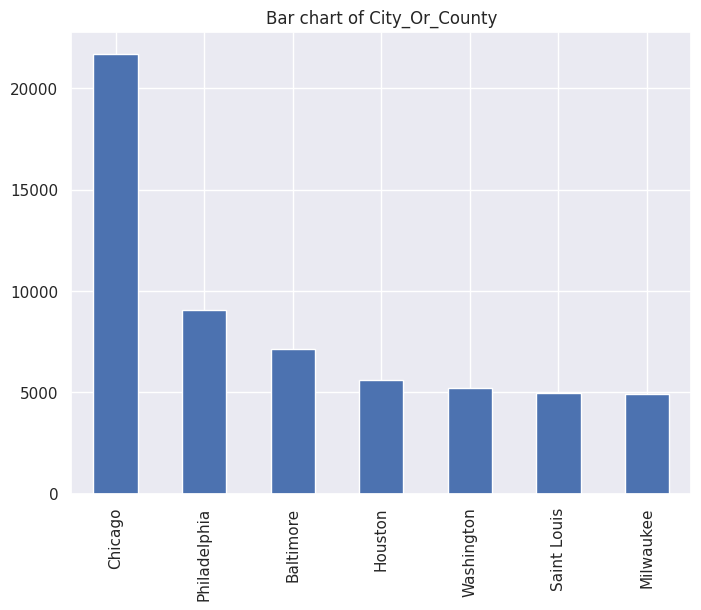

Class count of Address:

300 Indiana Ave               132
Main St                       121
Main Street                   103
I-10                           86
I-95                           83
                             ... 
731 E Rochambeau Dr             1
32162 Mount Gideon Rd           1
3800 block of Miramonte Pl      1
7000 block of Linworth Rd       1
32390-32498 Red Hill Rd         1
Name: Address, Length: 349738, dtype: int64


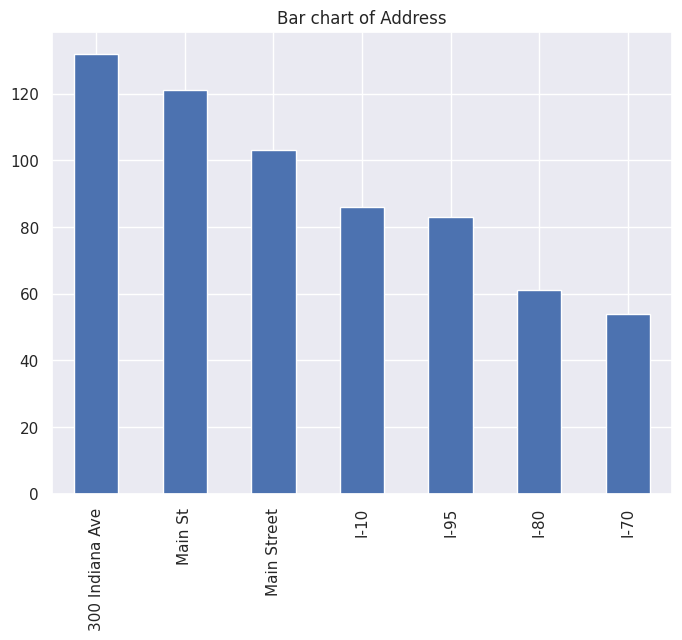

Class count of Day_Of_Week:

Sunday       66949
Saturday     64825
Monday       58236
Friday       57592
Wednesday    57292
Tuesday      57108
Thursday     56102
Name: Day_Of_Week, dtype: int64


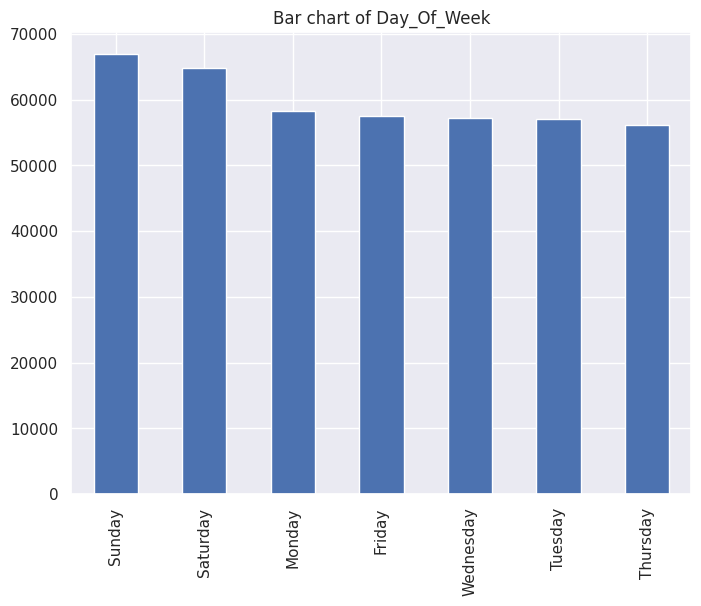

In [16]:
# ID not included
for col in cat_col[1:]:
    analyzer.analyze_category_variable(col, df)

#### 1.2. Liên tục

- Phân tích đơn biến với biến liên tục thông qua :

   - Các thông tin thống kê: Mean, Median, Mode, Min, Max và Range

   - Các thông tin thống kê liên quan đến sự phân tán dữ liệu như : Range, Q1, Q3 , IQR, phương sai, độ lệch, độ nhọn của phân phối

   - Trực quan hóa bằng histogram và boxplot

#### Nhóm không sử dụng `analyzer.analyze_numeric_variable(...)` vì dữ liệu cũng như đồ thị trực quan trả về vẫn chưa đầy đủ và cụ thể lắm, nên nhóm sẽ tự thiết kế lại.

- Ý nghĩa các dòng: 

    * `"missing_ratios: "` tỉ lệ giá trị thiếu
    * `"count": ` số lượng giá trị 

    * `"mean": ` giá trị trung bình
    * `"std": ` độ lệch chuẩn
    * `"min": ` giá trị nhỏ nhất
    * `"25%": ` giá trị phân vị 25%
    * `"50%": ` giá trị phân vị 50%
    * `"75%": ` giá trị phân vị 75%
    * `"max": ` giá trị lớn nhất
    * `"iqr": ` độ trải giữa
    * `"modes": ` giá trị xuất hiện nhiều nhất
    * `"range": ` max - min
    * `"skew": ` độ lệch
    * `"var": ` phương sai
    * `"kurtosis": ` độ nhọn phân phối

In [17]:
median = []
ranges = []
skew = []
var = []
kurtosis = []
iqr = []
modes = []
num_col = ['Killed', 'Injured', 'Total']

# Year & Month & DoW not included
for col in num_col:
    modes.append(st.mode(df[col]))
    iqr.append(df[col].quantile(.75) - df[col].quantile(.25))
    ranges.append(df[col].max() - df[col].min())
    skew.append(df[col].skew())
    var.append(df[col].var())
    kurtosis.append(df[col].kurtosis())

    
list = [modes, iqr, ranges, skew, var, kurtosis]
num_col_info_df = pd.DataFrame(data = list, columns = (['Killed', 'Injured', 'Total']))
num_col_info_df.index = ['mode', 'iqr', 'range', 'skew', 'var', 'kurtosis']

num_col_info_df = pd.concat([summary_df, num_col_info_df])

num_col_info_df.round(2)

,Killed,Injured,Total
missing_ratio,0.0,0.0,0.0
count,418104.0,418104.0,418104.0
mean,0.3,0.58,0.88
std,0.55,1.02,1.13
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,1.0
75%,1.0,1.0,1.0
max,59.0,441.0,500.0
mode,"([0], [306029])","([0], [219188])","([1], [238492])"


    - Lệch trái: Mean < Median < Mode.

    - Lệch phải: Mode < Median < Mean.

    - Đối xứng: Mode = Mean = Median

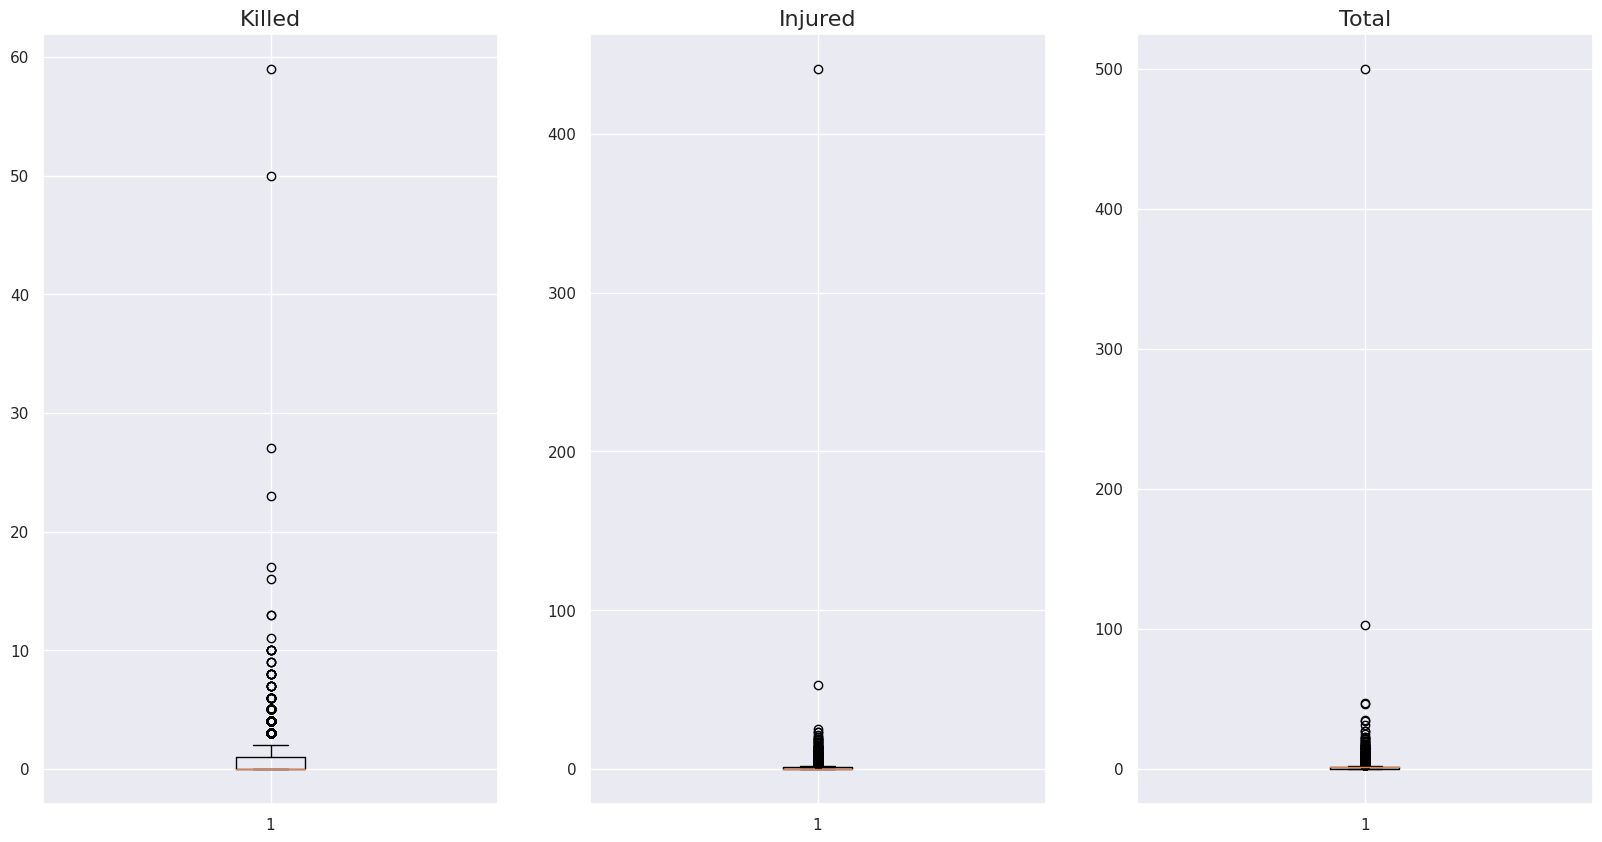

In [18]:
k = 0
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
for col in num_col:
    ax[k].boxplot(df[col])
    ax[k].set_title(col, fontsize = 16)

    k += 1
plt.show()

### 2. Phân tích đa biến
#### 2.1. Phân loại vs phân loại

- Phân tích đa biến phân loại vs phân loại thông qua :

    - Xây dựng bảng 2 chiều (two-way table)
    
    - Trực quan hóa bằng biểu đồ cột chồng (stacked columns bar)

    - Thực hiện phân tích thống kê bằng chi2

##### B1: Xây dựng bảng 2 chiều

In [19]:
tw_table = pd.crosstab(df['State_Code'], df['Year'])

tw_table

Year,2014,2015,2016,2017,2018,2019,2020,2021
State_Code,,,,,,,,
AK,91,309,389,266,232,140,98,102
AL,1019,938,1203,1396,1306,1298,1162,1204
AR,423,454,638,766,776,708,623,539
AZ,402,389,523,579,534,622,791,747
CA,3090,2891,3368,4343,3652,3195,3495,3342
CO,358,628,727,773,761,687,812,802
CT,411,674,742,713,778,749,787,618
DC,385,437,428,556,653,712,995,894
DE,329,324,300,382,360,417,389,271


##### B2: Trực quan hóa bằng biểu đồ cột chồng (stacked columns bar)

<Axes: xlabel='State_Code'>

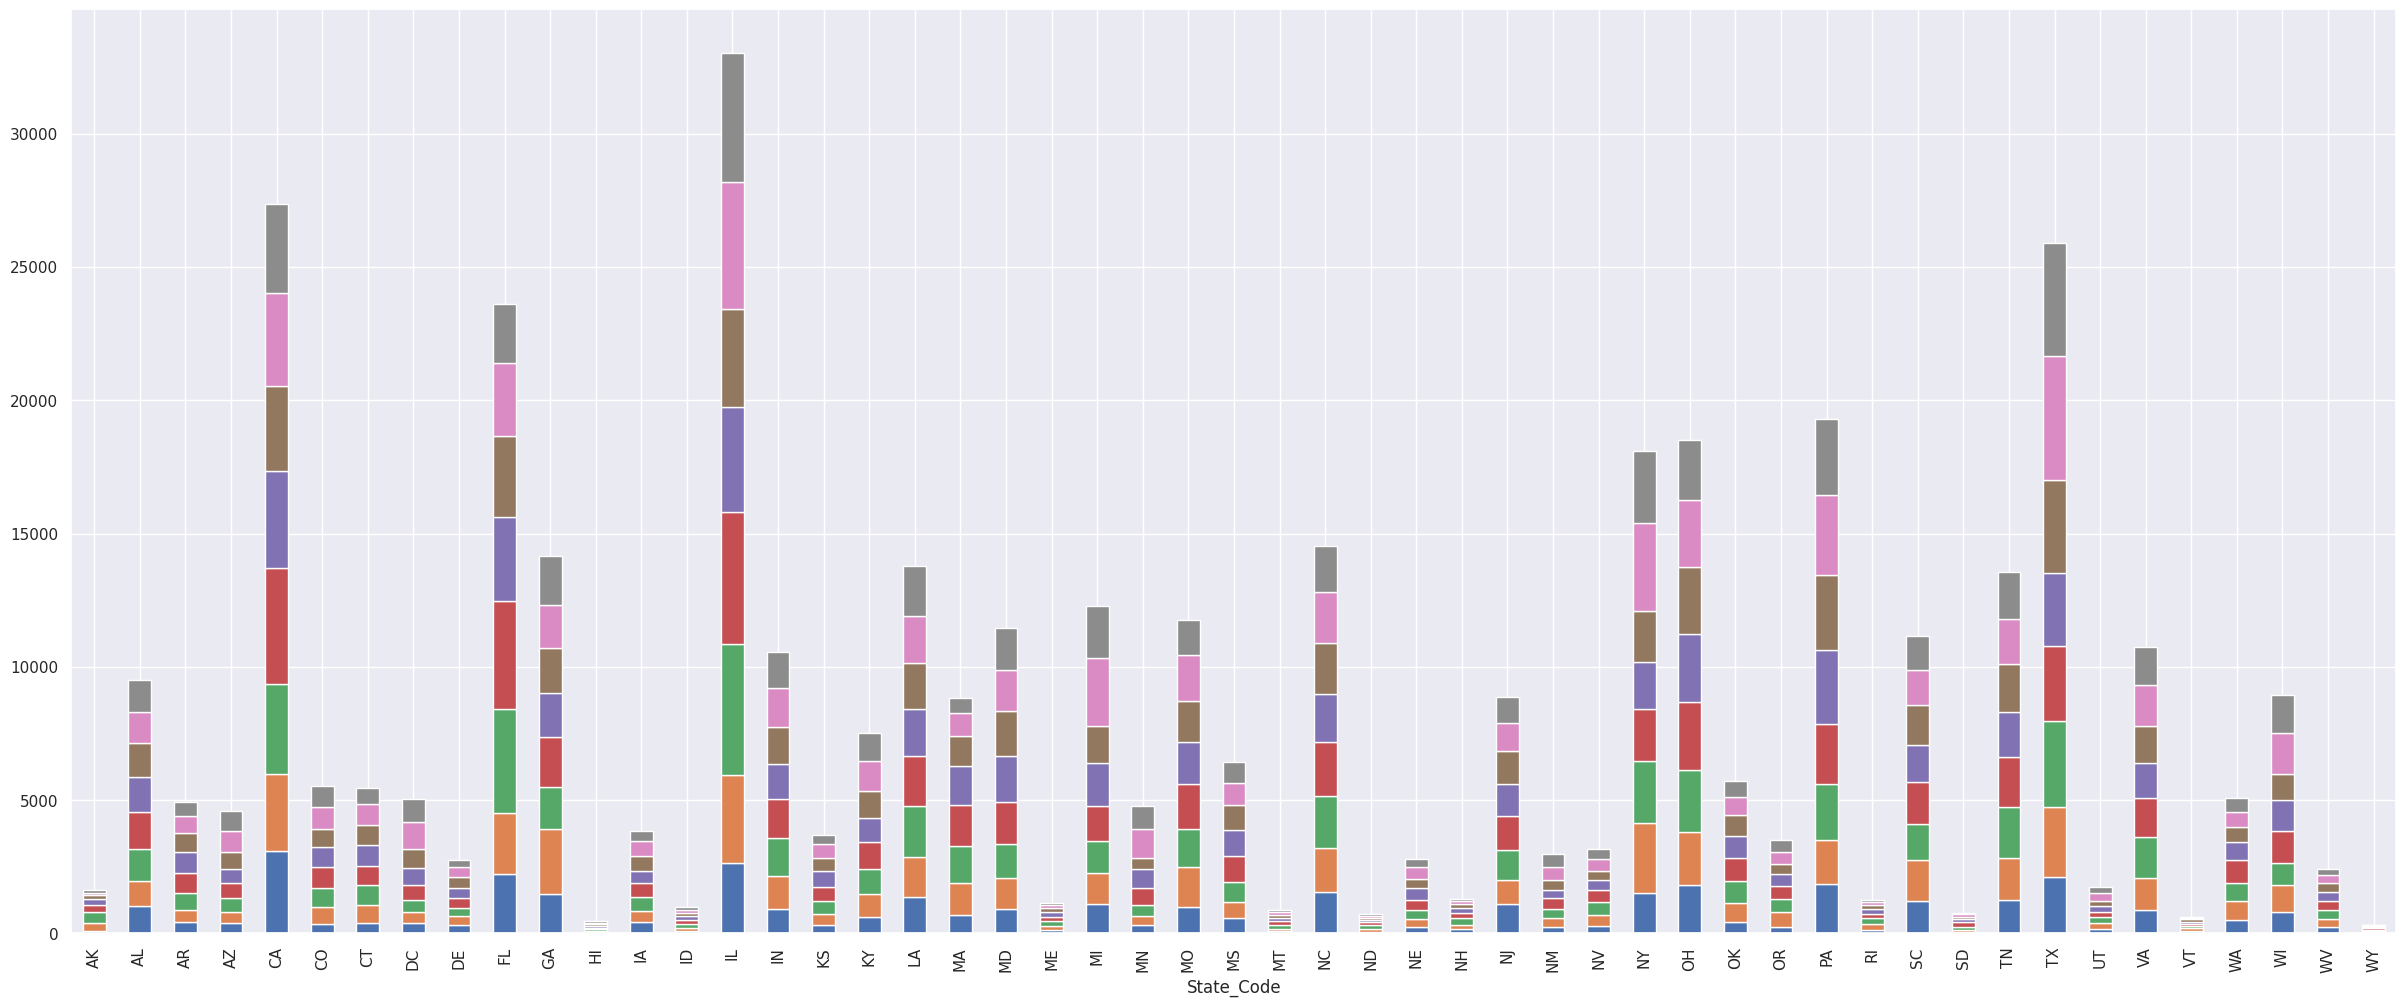

In [20]:
tw_table.plot(kind = 'bar', stacked = True, legend = False, figsize = (30, 12))

##### B3: Phân tích thống kê chi² (kiểm định chi bình phương / chi-square) để kiểm tra biến `độc lập` hay `phụ thuộc`.

- `chi2_contigency`: Hàm này tính toán thống kê chi bình phương và p-value cho phép kiểm tra giả thuyết về tính độc lập của các tần số được quan sát.

- Giả thuyết:

        - H0: 2 biến độc lập
        - Bác bỏ H0: 2 biến phụ thuộc


In [21]:
from scipy.stats import chi2_contingency

def use_chi_2_evaluation(tw_table, prob):
    """
    Use chi2 to check 2 category in two-way table Dependent or not
    parameter tw_table: two-way table of 2 category variable
    parameter prob: percent of chance that accept null hypothesis (H0-2 variable independent)
    """
    stats, p, dof, expected = chi2_contingency(tw_table)
    alpha = 1 - prob
    if p <= alpha:
        return 'Reject H0 - Dependent'
    else:
        return 'Fail to reject H0 - Independent'

In [22]:
use_chi_2_evaluation(tw_table, 0.95)

'Reject H0 - Dependent'

#### 2.2. Liên tục vs phân loại

- Phân tích đa biến liên tục vs phân loại thông qua:

   - Xây dựng bảng ANOVA và phân tích thống kê.
   
   - Trực quan hóa bằng box plot.

##### - `Kiểm định ANOVA (ANOVA test)` hay còn được gọi là `phân tích phương sai (Analysis of Variance)` là một kỹ thuật thống kê tham số được sử dụng để phân tích sự khác nhau giữa giá trị trung bình của các biến phụ thuộc với nhau

| Tên biến trả về | Kiểu dữ liệu | Ý nghĩa|
|                                -|            -|-|
sum_sq           |  float64      | Tổng bình phương cho các thuật ngữ mô hình.
df                  |  float64 | Bậc tự do
F                     |  float64     | Giá trị thống kê F `(là tỷ lệ biến thiên giữa các số trung bình mẫu và sự biến thiên trong nội bộ các mẫu)`
City_Or_County		           |  object     | Tên các thành phố hoặc quận diễn ra bạo lực tại Hoa Kỳ
PR(>F)          | float64 | Giá trị thống kê p (p-value)

- `C(Year)`: C = Constant, tức là không thay đổi.

- `Residual`: Sự khác biệt giữa giá trị quan sát và giá trị dự đoán trong mô hình hồi quy

                 sum_sq        df           F  PR(>F)
C(Year)     3423.739145       7.0  383.114389     0.0
Residual  533765.104375  418096.0         NaN     NaN


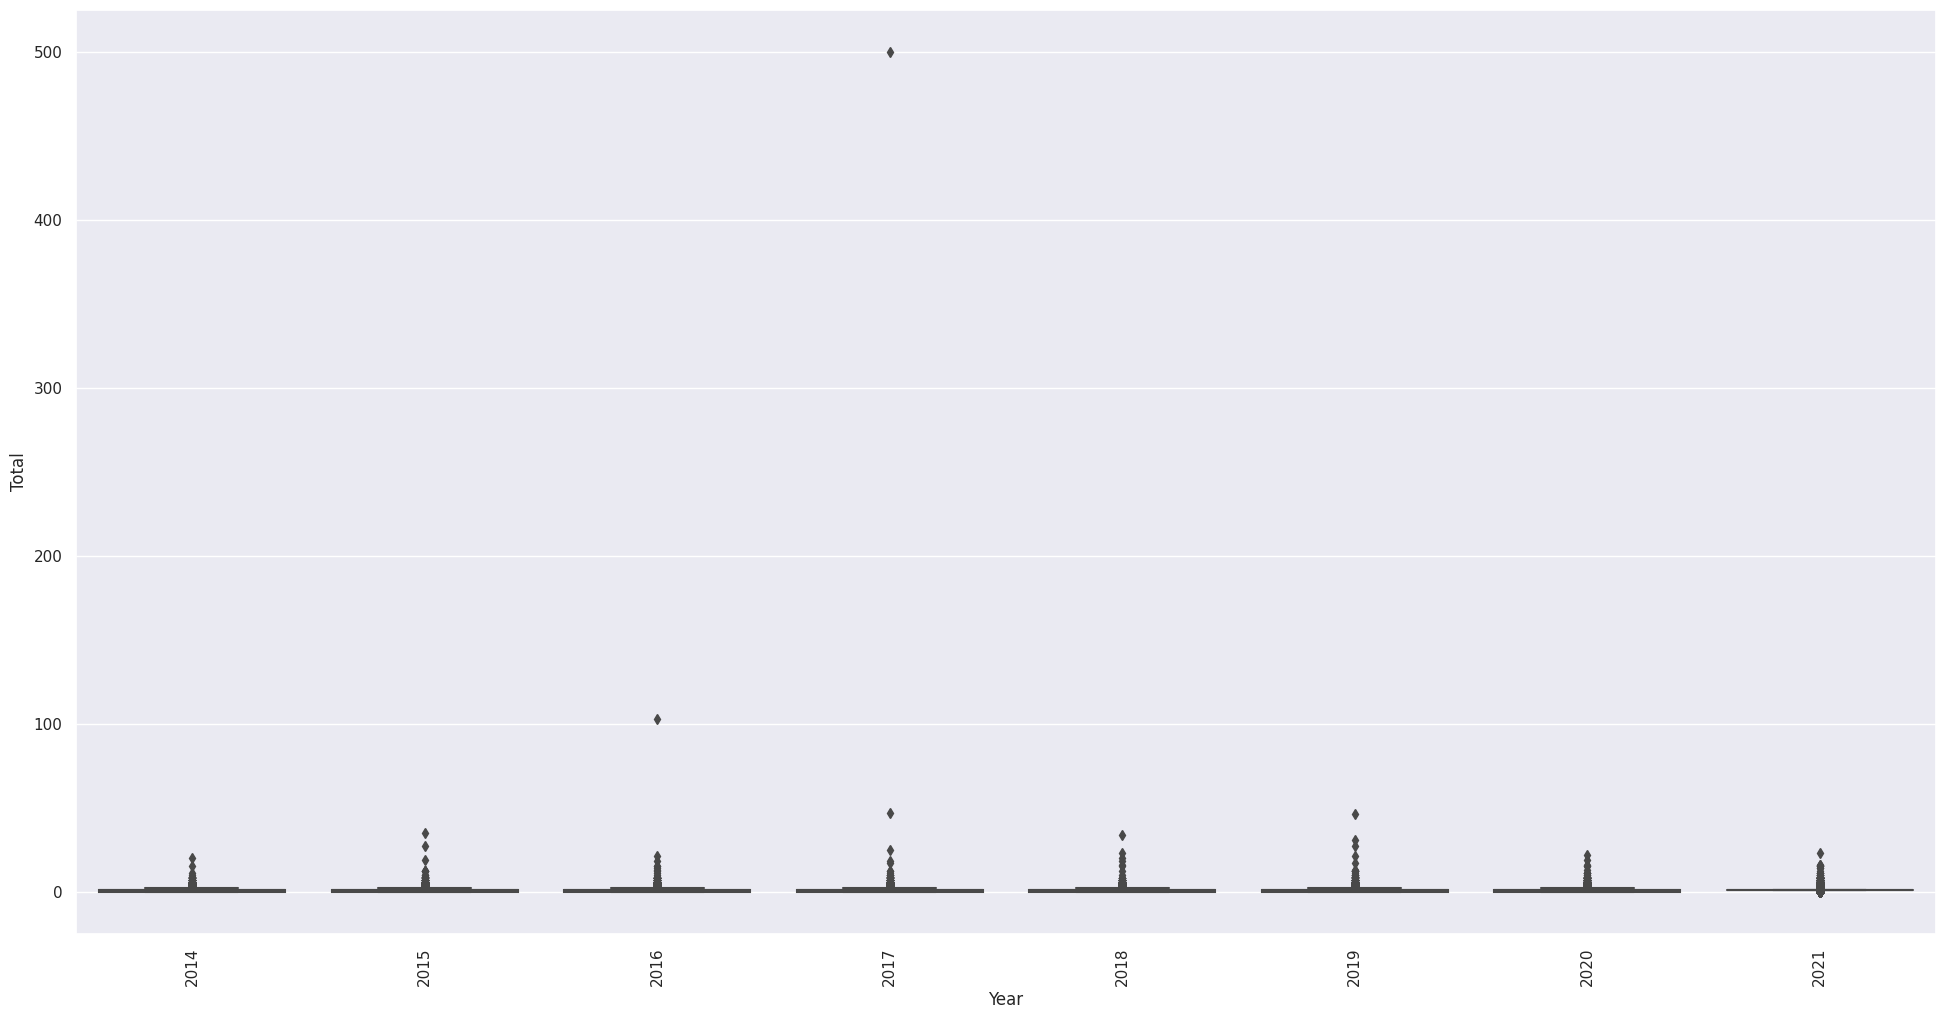

In [23]:
fig = plt.subplots(figsize = (24, 12))
analyzer.analyze_continous_vs_categories('Total', 'Year', df)

### 3. Phân tích outlier của biến liên tục

In [24]:
analyzer.check_outlier_of_numerical_variable('Total', df)

variable Total have 3.186% upper outlier
variable Total have 0.0% lower outlier


(Int64Index([  92148,   92174,   92194,   92292,   92328,   92405,   92479,
               92602,   92704,   92883,
             ...
             2201216, 2201351, 2201535, 2201716, 2201858, 2201887, 2203406,
             2205503, 2205731, 2401560],
            dtype='int64', name='Incident_ID', length=13322),
 Int64Index([], dtype='int64', name='Incident_ID'))

### 4. Phân tích hiện tượng mất cân bằng dữ liệu ở biến phân loại output

In [25]:
analyzer.check_imbalance_class('Total', df)

Class count of Total:

1      0.570413
0      0.300241
2      0.097483
3      0.021942
4      0.006054
5      0.002098
6      0.000849
7      0.000431
8      0.000184
9      0.000093
10     0.000048
12     0.000033
11     0.000029
15     0.000022
16     0.000010
18     0.000007
13     0.000007
14     0.000007
21     0.000005
23     0.000005
17     0.000005
19     0.000005
27     0.000005
20     0.000005
103    0.000002
35     0.000002
25     0.000002
500    0.000002
47     0.000002
34     0.000002
46     0.000002
31     0.000002
22     0.000002
Name: Total, dtype: float64
Ratio of 2 class is 238492.0
You should consider to handle imbalance


#### Xử lý mất cân bằng dữ liệu - UnderSampling

## III. Trực quan hóa dữ liệu
### 1. Heatmap

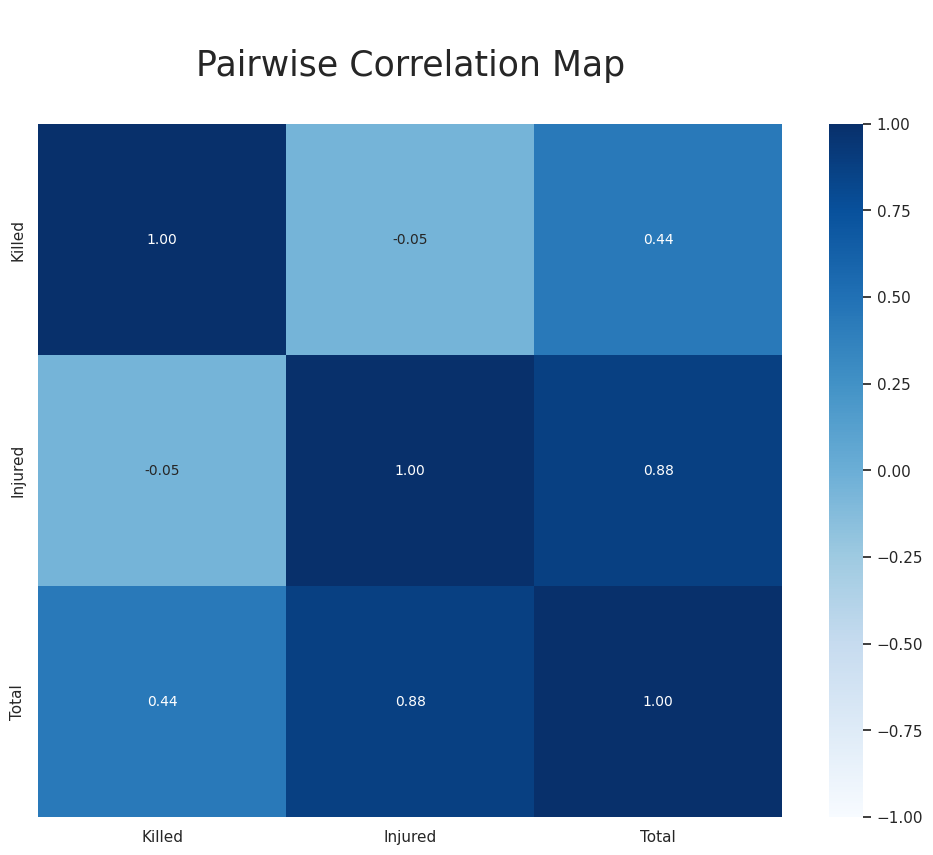

In [26]:
sns.set_style("white")
matrix = df.iloc[:, :-4].corr()      # Year & Month & DoW not included
f,ax=plt.subplots(figsize = (matrix.shape[0] * 4,
                                matrix.shape[1] * 3))
sns.heatmap(df.iloc[:, :-4].corr(),
            annot= True,
            fmt = ".2f",
            ax=ax,
            vmin = -1,
            vmax = 1,
            cmap = "Blues",
            annot_kws={"size": 10})
plt.xticks(0.5 + np.arange(matrix.shape[0]), matrix.columns)
plt.yticks(0.5 + np.arange(matrix.shape[0]), matrix.columns)
plt.title('\nPairwise Correlation Map\n', size = 25)
plt.show()

### ` Nhận xét: `
   - Ta thấy `Injured` ảnh hưởng tới `Total` nhiều hơn là `Killed`

   - `Injured` và `Killed` không ảnh hưởng gì nhiều tới nhau.

### 2. Barchart

- Chúng ta tiến hành trực quan thêm bằng barchart để làm rõ hơn các mối tương quan này, đồng thời có cái nhìn trực quan hơn về dữ liệu.

<h2 style='color:#6ac61f'> Câu hỏi 1: Xu hướng các vụ nổ súng theo các năm, quý, tháng và các ngày trong tuần ở mỹ là như thế nào? </h2>

### **- Thống kê theo năm**

In [27]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

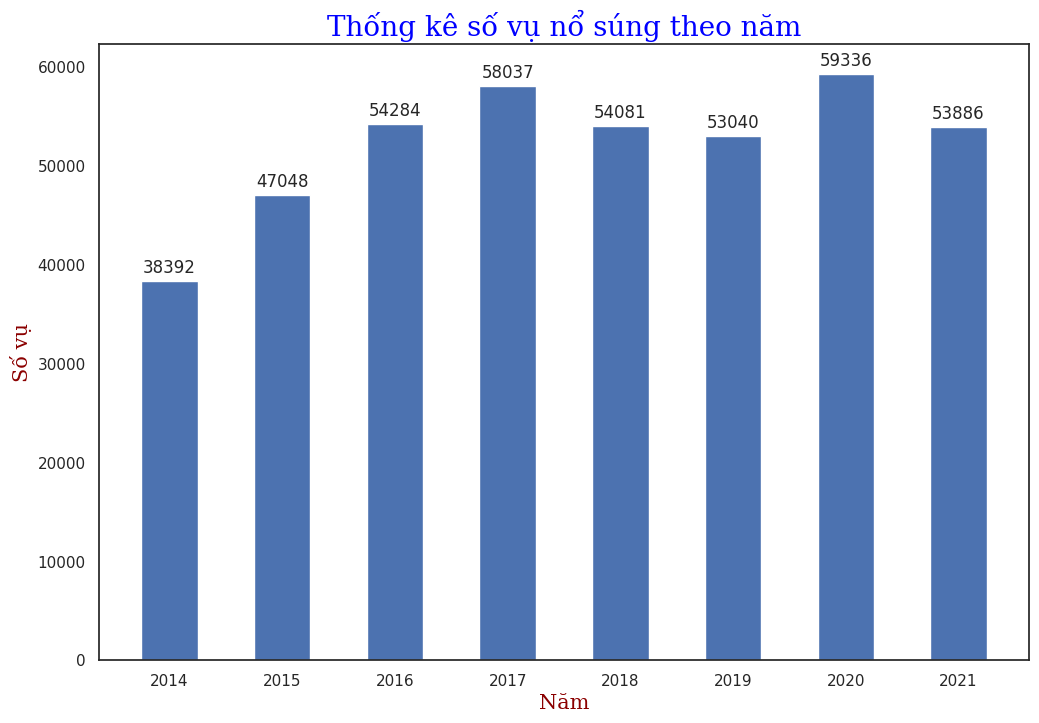

In [28]:
number_y = df.groupby(['Year']).size()
labels_y = pd.Series(df['Year'].unique()).sort_values()
x_y = np.arange(2014, 2022)
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)

rects1 = ax.bar(x_y, number_y, 0.5)

ax.set_ylabel('Số vụ', fontdict = font2)
ax.set_xlabel('Năm', fontdict = font2)
ax.set_title('Thống kê số vụ nổ súng theo năm', fontdict = font1)
ax.set_xticks(x_y)

ax.bar_label(rects1, padding = 3)

fig.savefig("year_number.png")
plt.show()

#### `Nhận xét:` Số vụ nổ súng tăng mạnh từ năm 2014-2017. Nhưng lại giảm từ năm 2017-2019 nhưng tốc độ giảm không bằng so với lúc tăng trước đây. Nhưng lại tăng mạnh chỉ sau đó 1 năm rùi tới năm 2021 lại giảm. Tăng mạnh nhất từ năm 2014-2015 (tăng gần 9000 vụ nổ súng).

### **- Thống kê theo quý**

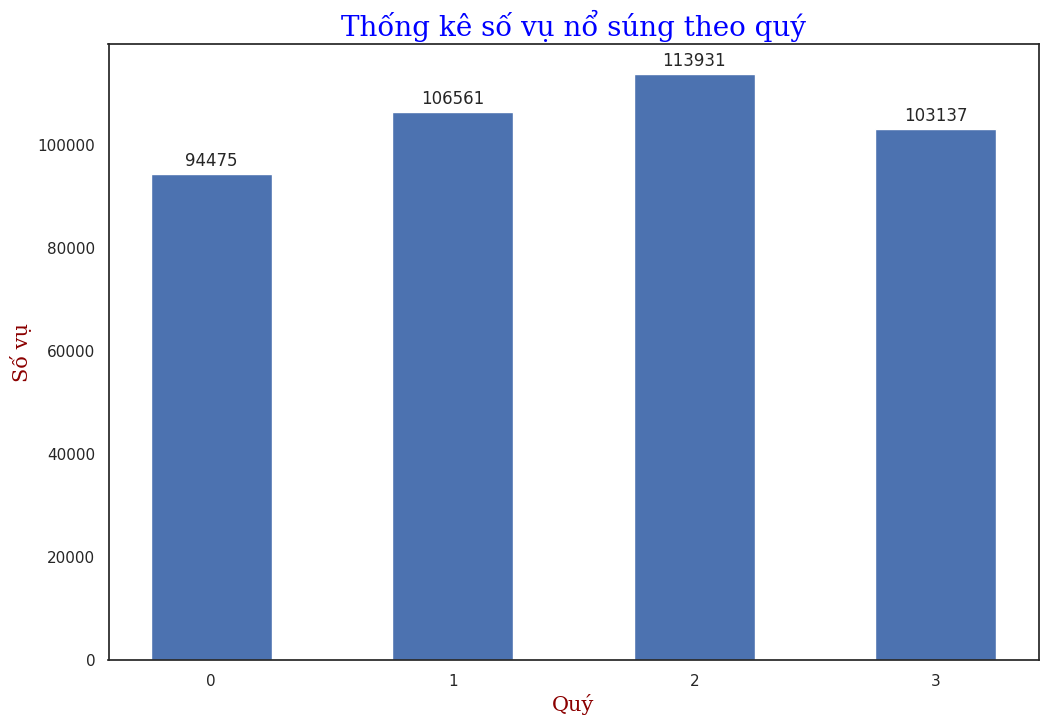

In [29]:
number_q = df.groupby(['Quarter']).size()
labels_q = pd.Series(df['Quarter'].unique()).sort_values()
x_q = np.arange(len(range(1, 5)))
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)

rects1 = ax.bar(x_q, number_q, 0.5)

ax.set_ylabel('Số vụ', fontdict=font2)
ax.set_xlabel('Quý', fontdict=font2)
ax.set_title('Thống kê số vụ nổ súng theo quý', fontdict=font1)
ax.set_xticks(x_q)

ax.bar_label(rects1, padding=3)

fig.savefig("quarter_number.png")

plt.show()

#### `Nhận xét:` Số vụ nổ súng diễn ra nhiều nhất ở quý 3 sau đó tới quý 2, quý 4 và thấp nhất là quý 1.

### **- Thống kê theo tháng**

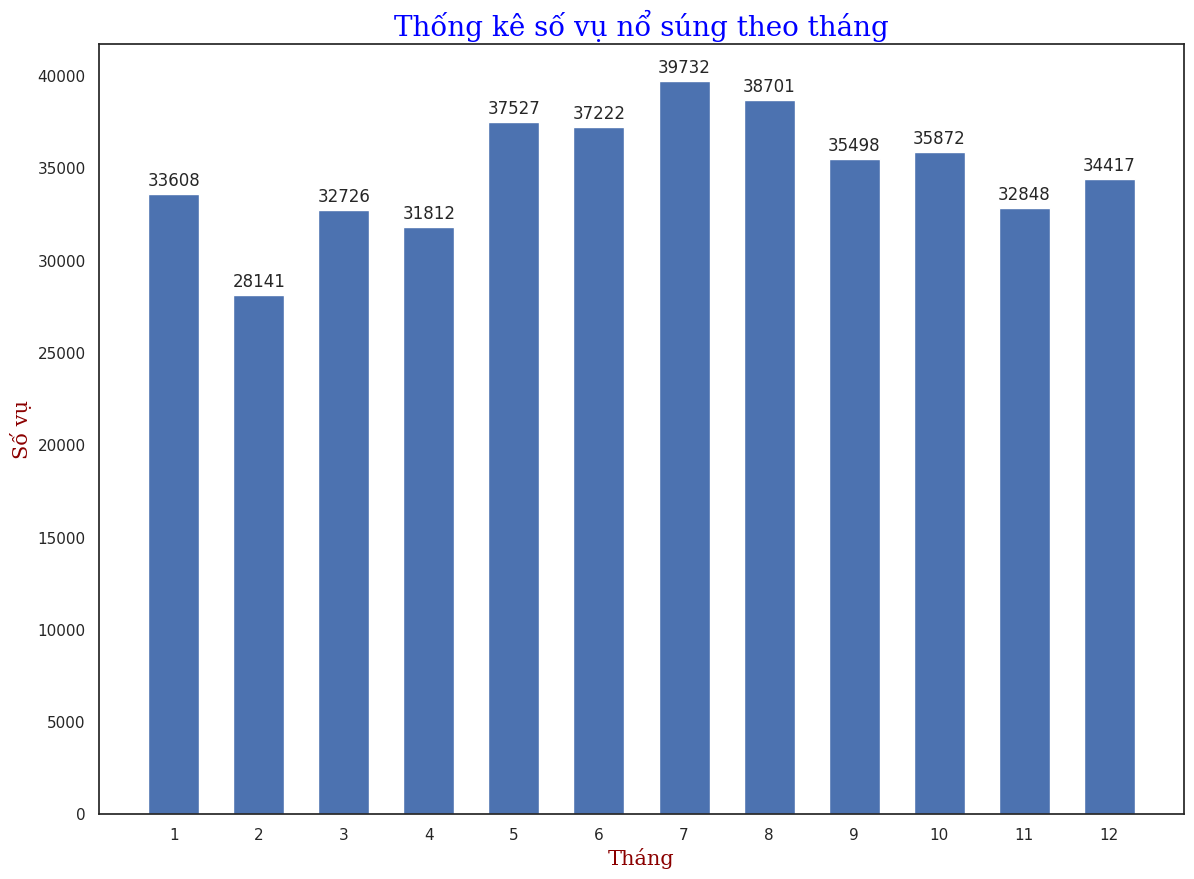

In [30]:
number_m = df.groupby(['Month']).size()
labels_m = pd.Series(df['Month'].unique()).sort_values()
x_m = np.arange(1, 13)
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)

rects1=ax.bar(x_m, number_m, 0.6)

ax.set_ylabel('Số vụ', fontdict = font2)
ax.set_xlabel('Tháng', fontdict = font2)
ax.set_title('Thống kê số vụ nổ súng theo tháng', fontdict = font1)
ax.set_xticks(x_m)

ax.bar_label(rects1, padding=3)

fig.savefig("month_number.png")

plt.show()

#### `Nhận xét:` 3 tháng xảy ra ít vụ nổ súng nhất là tháng 2, tháng 3, tháng 4. Trong đó tháng 2 là thấp nhất có lẽ bởi là ít ngày nhất trong năm. 3 tháng xảy ra nhiều vụ nổ súng nhất là tháng 5, tháng 7, tháng 8. Trong đó tháng 7 là tháng xảy ra nhiều vụ nhất trong tất cả các tháng

### **- Thống kê theo các ngày trong tuần:**

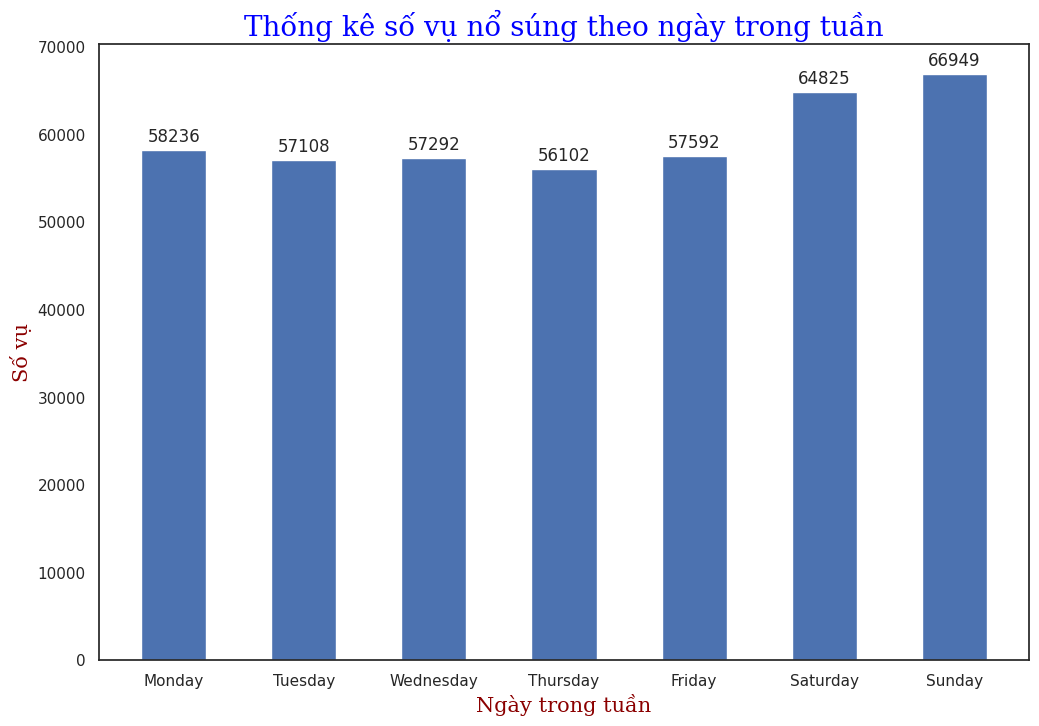

In [31]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
number_d = df.groupby(['Day_Of_Week']).size().reindex(cats)
labels_d = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x_d = np.arange(1, 8)
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)

rects1 = ax.bar(labels_d, number_d, 0.5)

ax.set_ylabel('Số vụ', fontdict = font2)
ax.set_xlabel('Ngày trong tuần', fontdict = font2)
ax.set_title('Thống kê số vụ nổ súng theo ngày trong tuần', fontdict = font1)

ax.bar_label(rects1, padding=3)

fig.savefig("day_number.png")

plt.show()

#### `Nhận xét:` Số lượng vụ nổ súng xảy ra nhiều trong các ngày cuối tuần (thứ 7 và chủ nhật), các ngày còn lại cũng xảy ra nhưng không chênh lệch nhau quá nhiều và không nhiều bằng 2 ngày cuối tuần.

<h2 style='color:#6ac61f'> Câu hỏi 2: Thiệt hại về người từ các vụ nổ súng theo năm, quý, tháng và ngày trong tuần ở Mỹ là như thế nào? </h2>

In [32]:
def incident_plot(df, col, title):
    dict = []

    for i in range(df[col].min(), df[col].max() + 1):
        dict1 = df[df[col] == i]
        dict.append(dict1[['Killed', 'Injured', 'Total']].sum())

    labels = df[col].unique()
    killed = []
    injured = []
    total = []

    for i in range(len(labels)):
        killed.append(dict[i]['Killed'])
        injured.append(dict[i]['Injured'])
        total.append(killed[i] + injured[i])

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize = (24, 12))
    rects1 = ax.bar(x - width/2 - 0.1, killed, width, label = 'Killed')
    rects2 = ax.bar(x + width/2 - 0.1, injured, width, label = 'Injured')
    rects3 = ax.bar(x + width/2 + 0.2, total, width, label = 'Total')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Thiệt hại về người', fontsize = 20)
    ax.set_title('Thống Kê Thiệt Hại Về Người Theo ' + title, fontsize = 30)
    ax.set_xlabel(title, fontsize = 20)


    # set amounts
    ax.bar_label(rects1, padding = 3)
    ax.bar_label(rects2, padding = 3)
    ax.bar_label(rects3, padding = 3)

    ax.set_xticks(x)
    ax.set_xticklabels(range(df[col].min(), df[col].max() + 1))

    fig.tight_layout()

    fig.savefig(title)

    # PLOT
    ax.legend(fontsize = 20)
    plt.show()

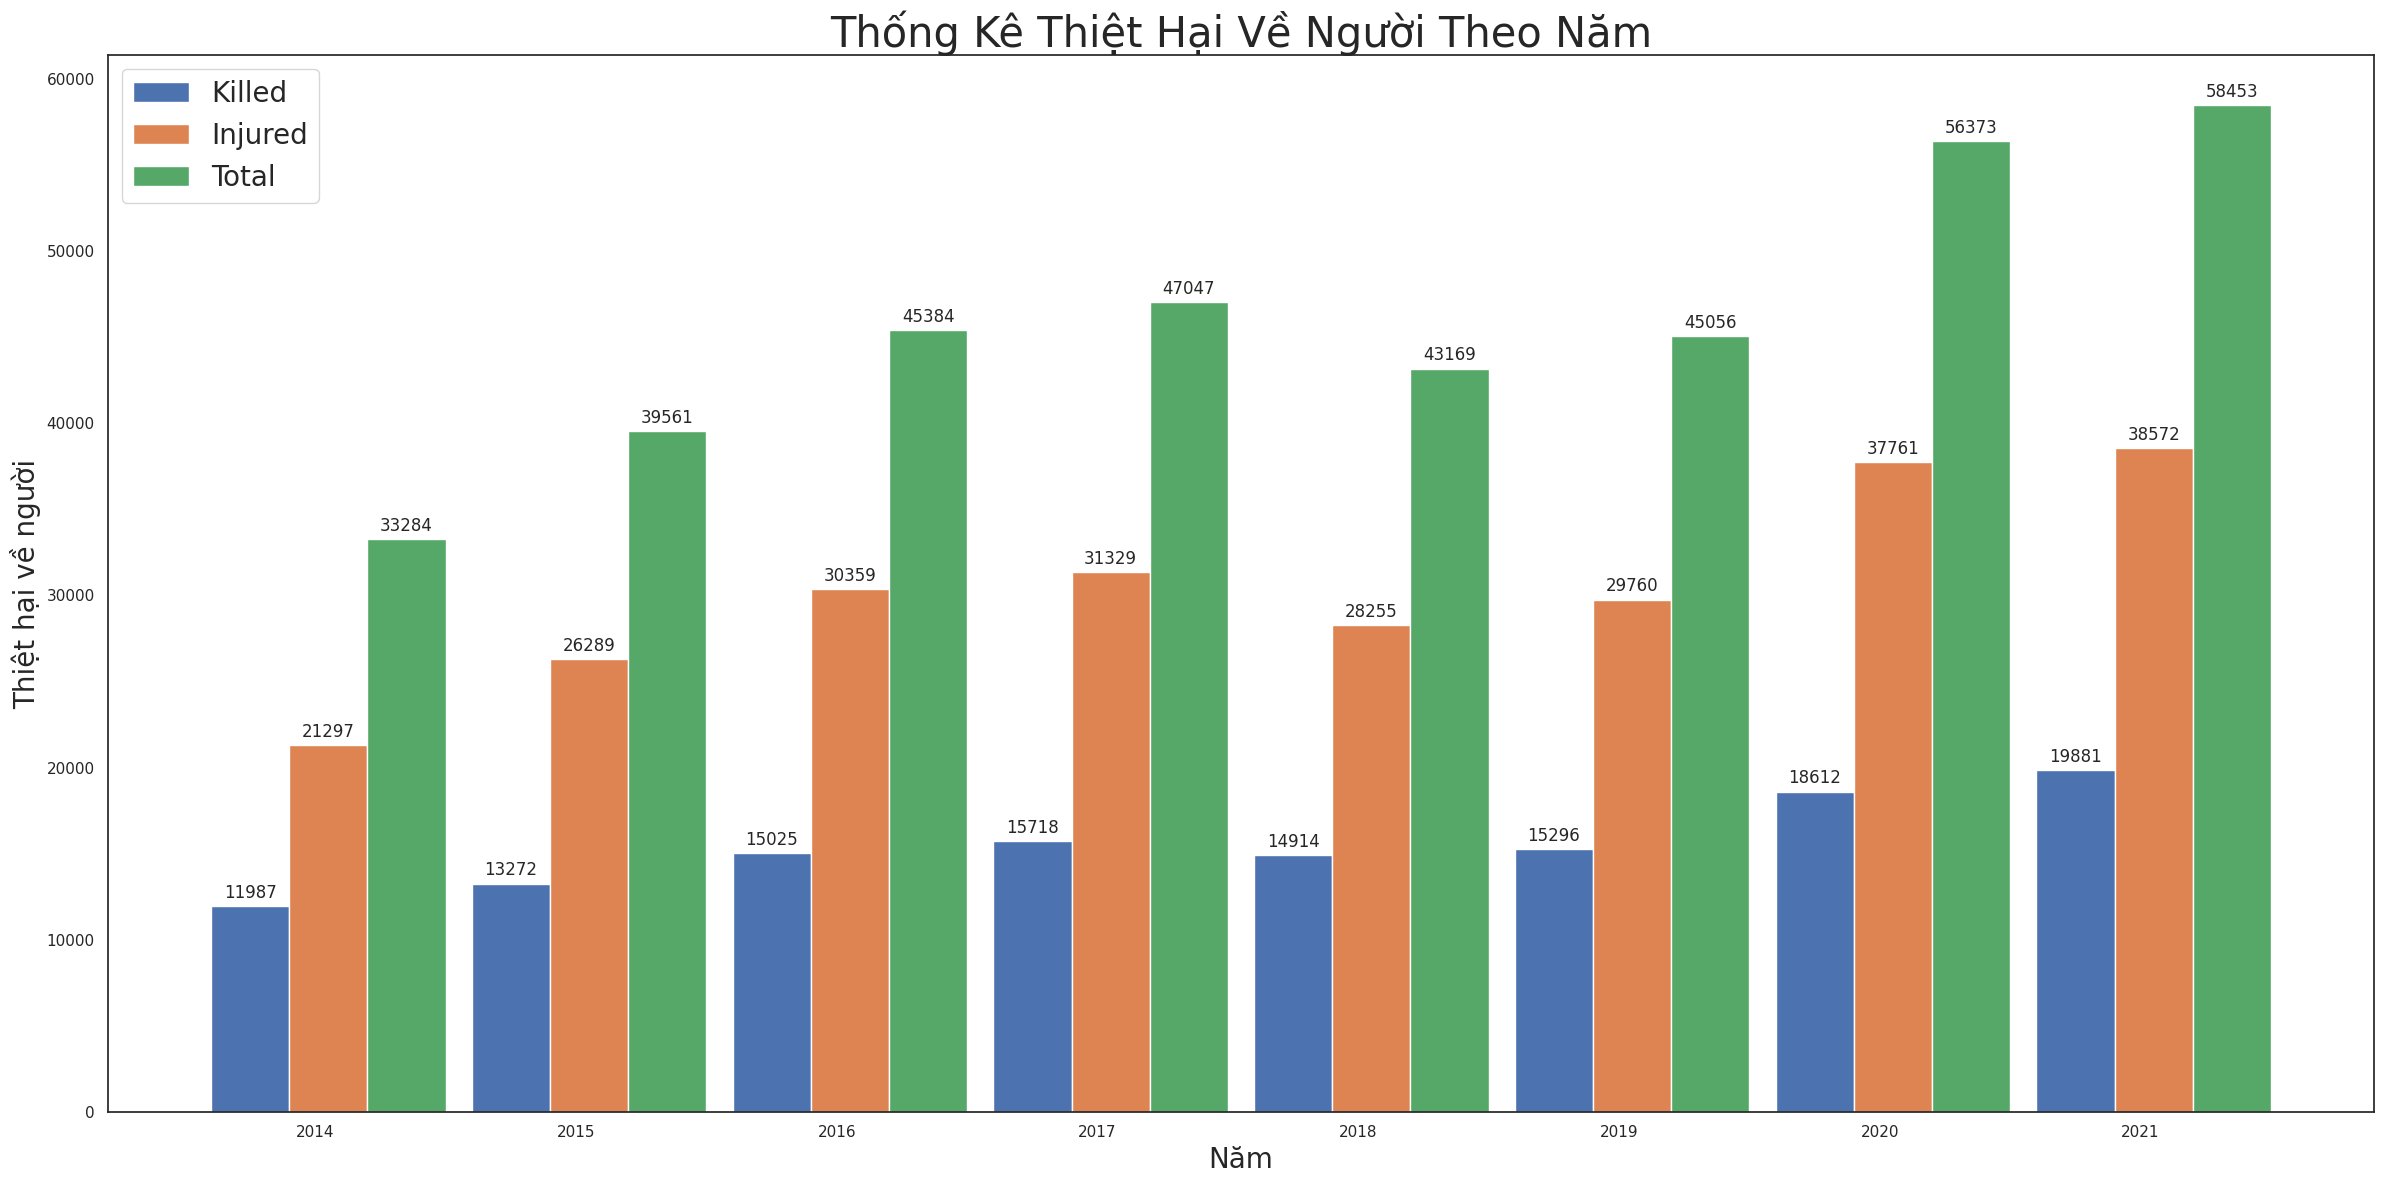

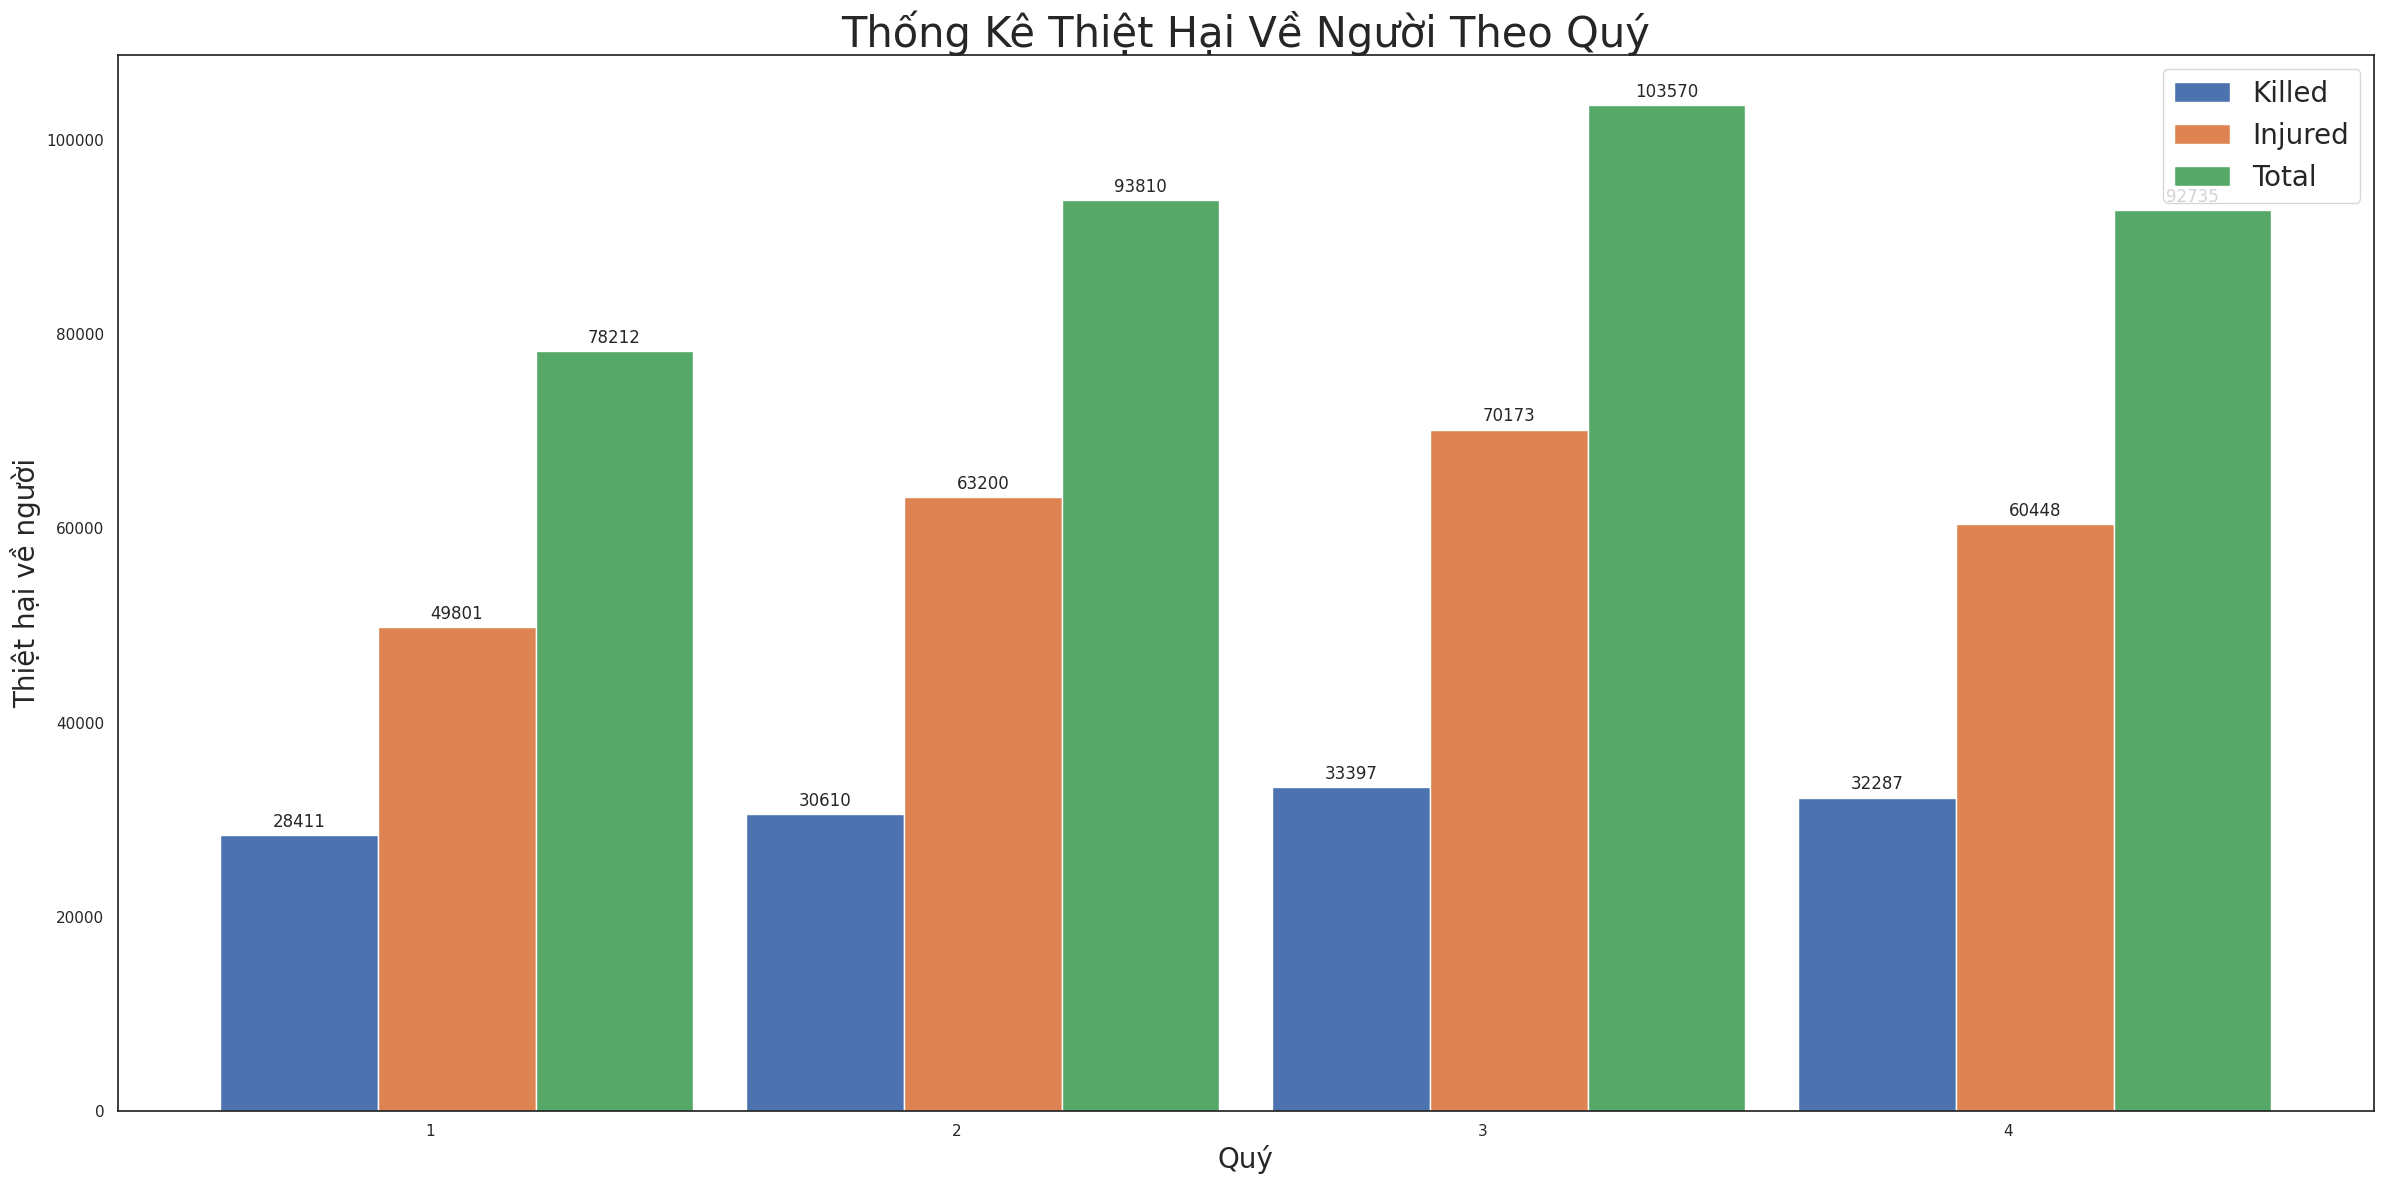

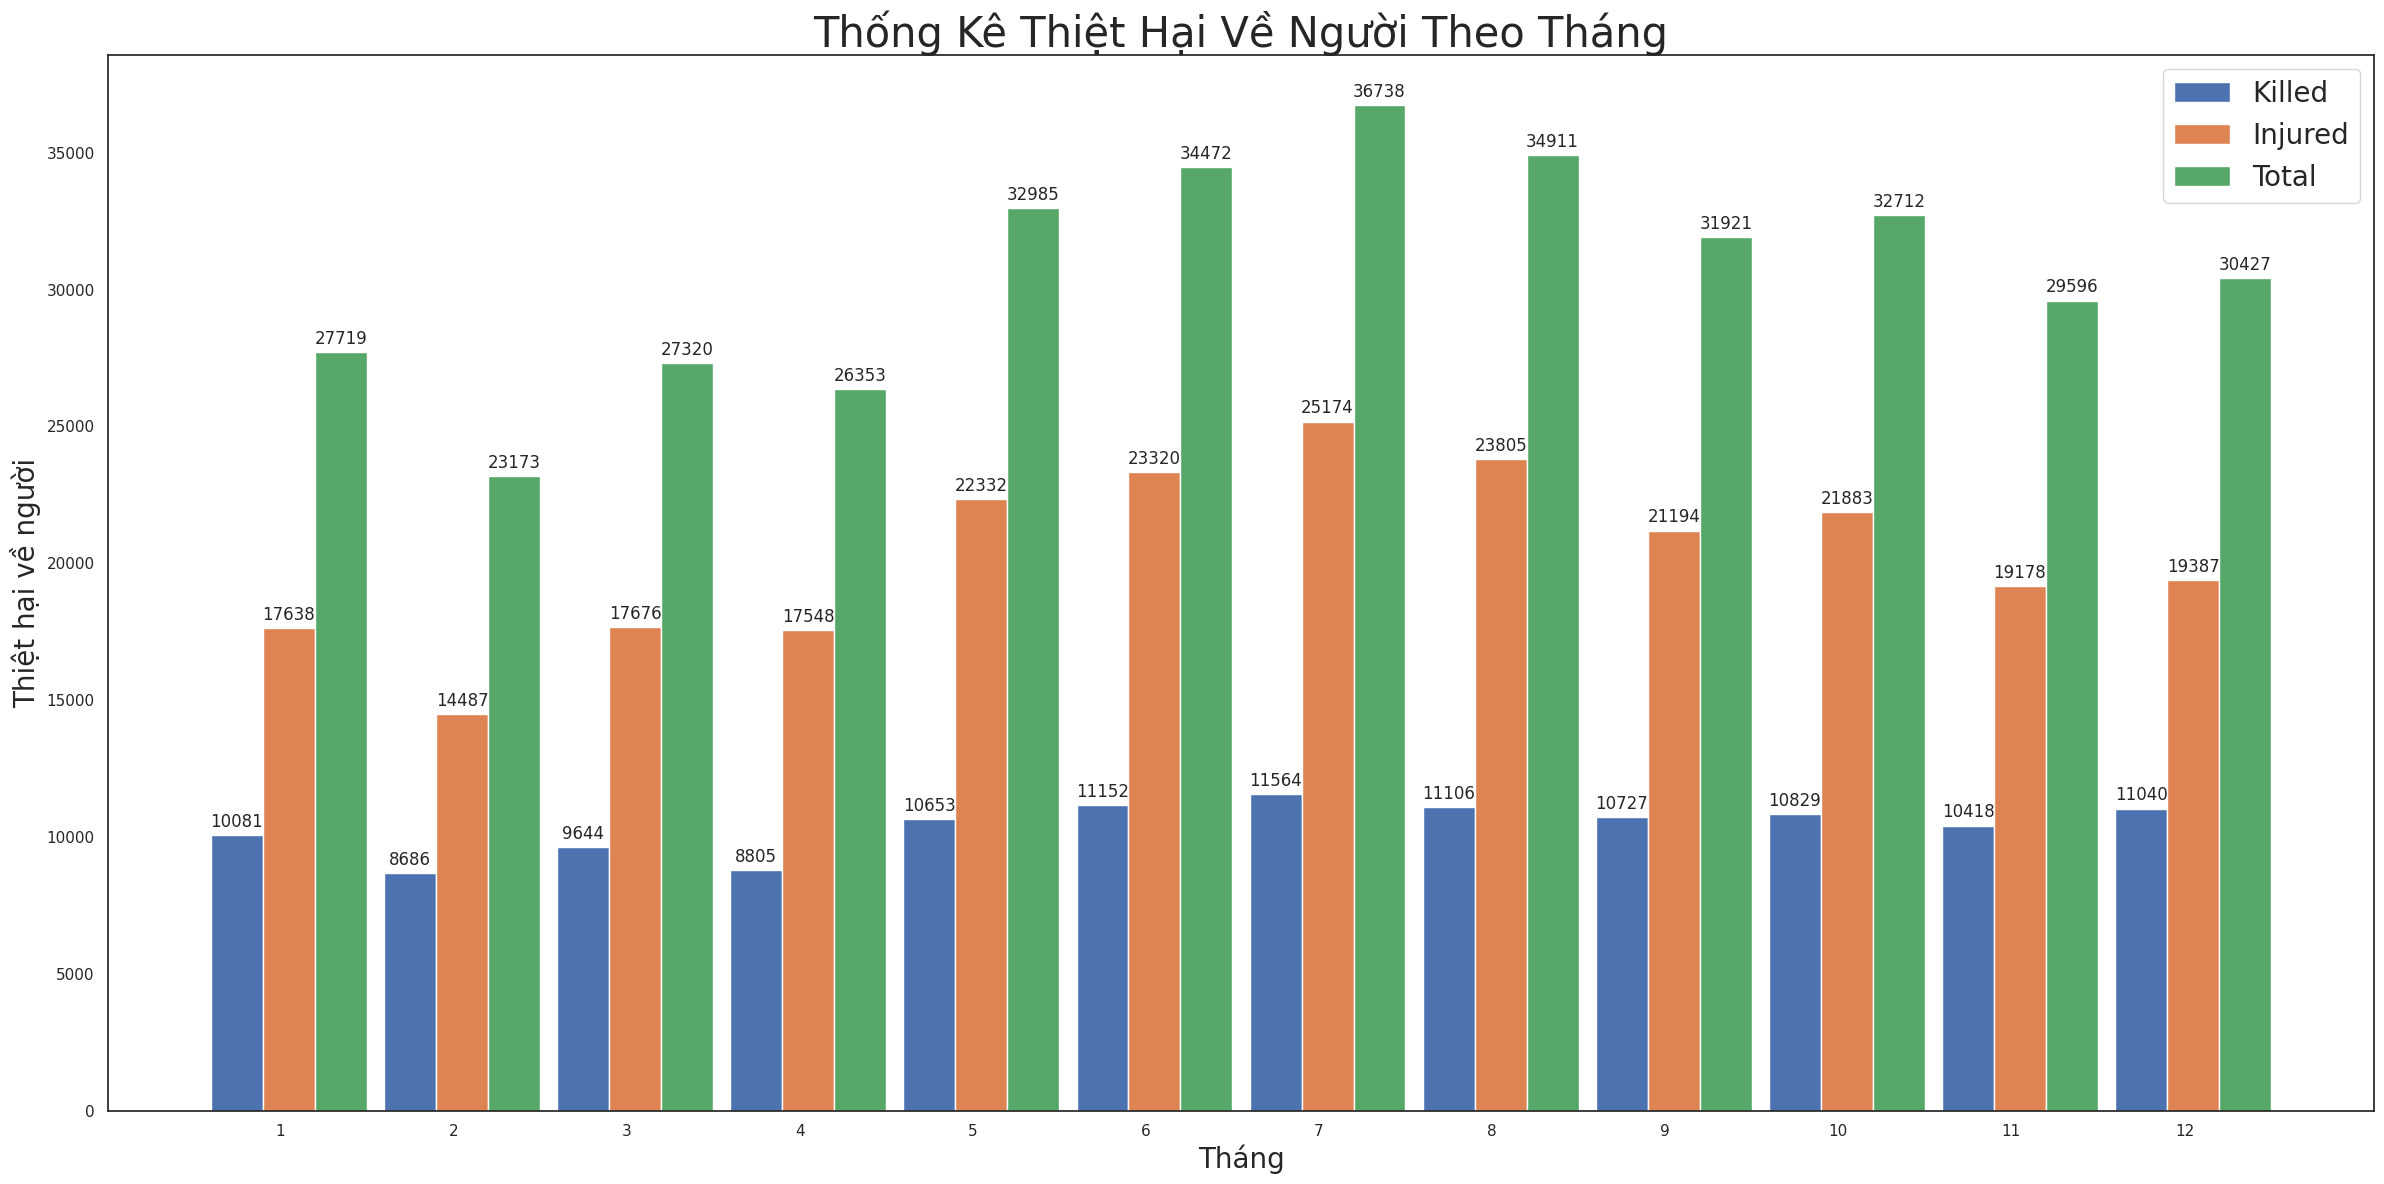

In [33]:
incident_plot(df, 'Year', 'Năm')
incident_plot(df, 'Quarter', 'Quý')
incident_plot(df, 'Month', 'Tháng')

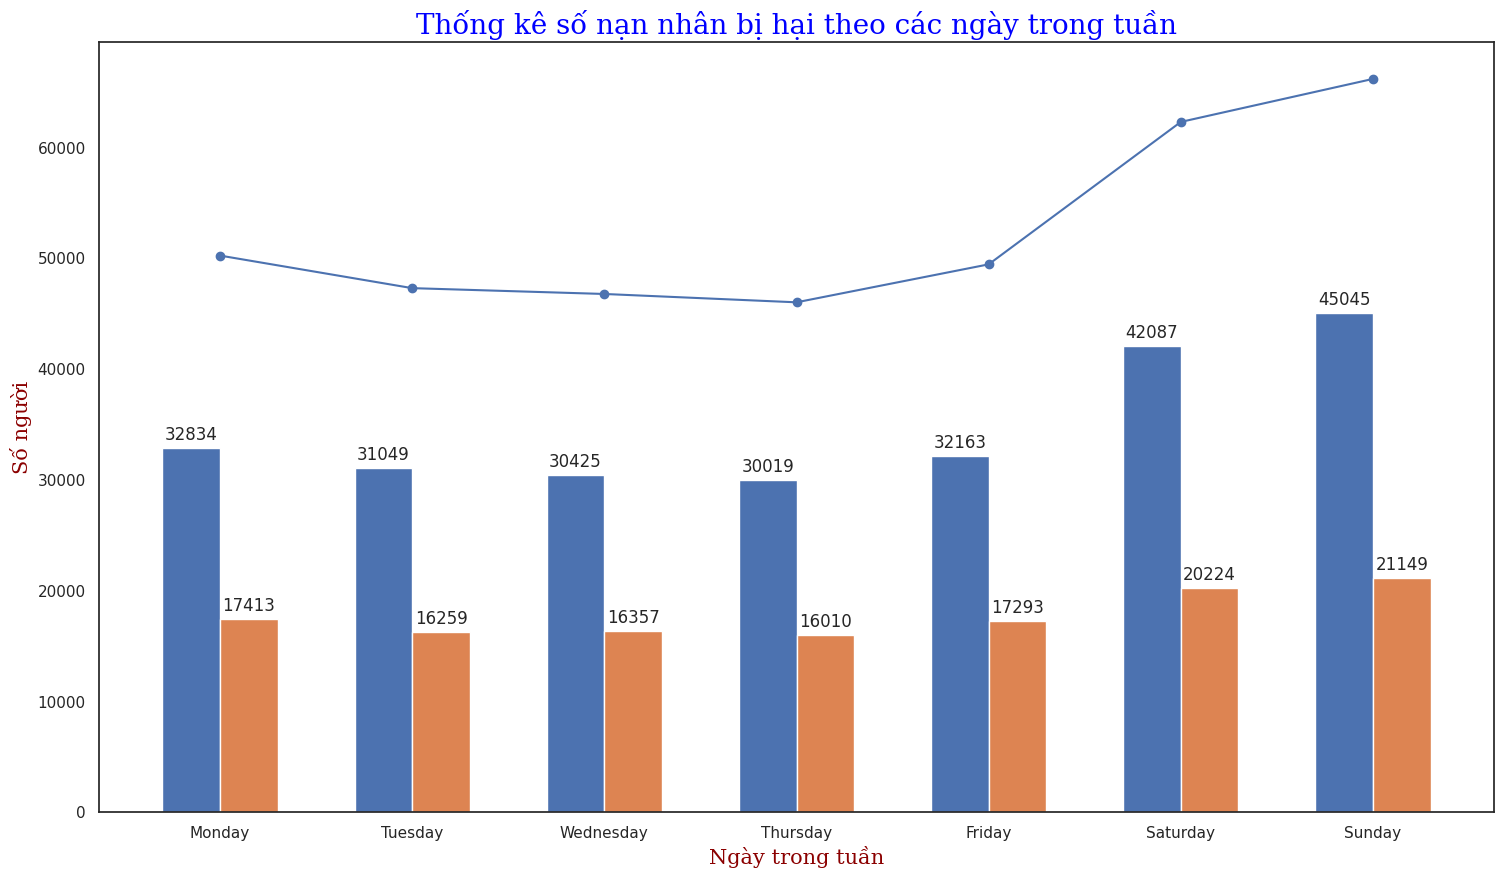

In [34]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
kill_d = df.groupby(['Day_Of_Week']).sum()["Killed"].reindex(cats)
injured_d = df.groupby(['Day_Of_Week']).sum()["Injured"].reindex(cats)
total_d = df.groupby(['Day_Of_Week']).sum()["Total"].reindex(cats)
labels_d = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x_d = np.arange(1,8)
width = 0.3
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(18)

rects1 = ax.bar(x_d - width/2, injured_d, width, label = 'Injured')
rects2 = ax.bar(x_d + width/2, kill_d, width, label = 'Killed')
rects3 = ax.plot(x_d, total_d, marker = "o", label = 'Total')

ax.set_ylabel('Số người', fontdict = font2)
ax.set_xlabel('Ngày trong tuần', fontdict = font2)
ax.set_title('Thống kê số nạn nhân bị hại theo các ngày trong tuần', fontdict = font1)

ax.set_xticks(x_d)
ax.set_xticklabels(labels_d)

ax.bar_label(rects1, padding = 3)
ax.bar_label(rects2, padding = 3)

fig.savefig("day_of_week_people.png")

plt.show()

#### ` Nhận xét: `

- Điểm chung: Số người bị thương luôn nhiều hơn (gần như gấp đôi) so với số người chết. Điều này lý giải được vì sao `Injured` có hệ số tương quan tuyến tính lớn hơn `Killed` khi đối chiếu với `Total`.

- `Theo năm`:
   
   - Thiệt hại về người có xu hướng tăng dần theo năm.

   - Từ năm 2017-2018 có xu hướng giảm nhưng sau đó 1 năm đã tăng lại. Từ năm 2014-2016 và từ năm 2019-2020 có xu hương tăng mạnh rất nhiều.

- `Theo quý`:

   - Thiệt hại về người có xu hướng tăng dần theo quý.
   
   - Số lượng các nạn nhân bị hại do các vụ nổ súng gây ra theo các quý thì dường như với quý 1 và quý 4 thường có số lượng nạn nhân bị hại thấp hơn quý 2 và quý 3. Quý 1 là thấp nhất

- `Theo tháng`:

   - Đồ thị phân phối đối xứng. Có xu hướng chạm đỉnh ở các tháng giữa năm (5, 6, 7, 8).

   - Tháng 2 có ít người bị hại nhất do các vụ nổ súng diễn ra có thể bởi vì ít ngày nhất trong các tháng của năm. 

   - Biểu đồ này còn thể hiện rõ các tháng ở quý 1 và quý 4 ít nạn nhân bị hại so với các tháng còn lại. 
   
   - Các nạn nhân bị hại nhiều từ tháng 5 đến tháng 8. Đặc biệt bị hại nhiều nhất ở tháng 7 và tháng 8.

- `Theo tuần `:

   - Số lượng nạn nhân bị ảnh hưởng nhiều trong các ngày cuối tuần (thứ 7 và chủ nhật)
   
   - Các ngày còn lại cũng bị ảnh hưởng nhưng không chênh lệch nhau quá nhiều và không nhiều bằng 2 ngày cuối tuần.

<h2 style='color:#6ac61f'> Câu hỏi 3: Số vụ xảy ra nổ súng của các bang như thế nào? </h2>

- Tên tiểu bang tương ứng với State_Code

In [35]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
inv_us_state_to_abbrev = {v: k for k, v in us_state_to_abbrev.items()}
df["State_Name"] = df["State_Code"].map(inv_us_state_to_abbrev)

### **- Thống kê số vụ nổ súng theo các tiểu bang ở Mỹ:**

In [36]:
data = df.groupby(['State_Code','State_Name']).size()
data = data.reset_index()
data = data.rename(columns={'index': 'State_Code', 0: 'Incident_Count'})

In [37]:
fig = px.choropleth(data,
                    locations='State_Code',
                    hover_name='State_Name',
                    color='Incident_Count',
                    locationmode='USA-states',
                    scope='usa')
fig.update_layout(
    title={'text':'Number of gun violence incidents by state',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()


### **- Thống kê trung bình số người bị thương trong mỗi vụ nổ súng:**

In [38]:
data = df.groupby(['State_Code','State_Name'])['Injured'].mean()
data = data.reset_index()
data = data.rename(columns={'index': 'State_Code', 0: 'Incident_Count'})

In [39]:
fig = px.choropleth(data,
                    locations = 'State_Code',
                    hover_name = 'State_Name',
                    color = 'Injured',
                    locationmode = 'USA-states', 
                    scope = 'usa')

fig.update_layout(
    title={'text':'Trung bình số người bị thương trong mỗi vụ nổ súng',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()

### **- Thống kê trung bình số người chết trong mỗi vụ nổ súng:**

In [40]:
data = df.groupby(['State_Code','State_Name'])['Killed'].mean()
data = data.reset_index()
data = data.rename(columns={'index': 'State_Code', 0: 'Incident_Count'})

In [41]:
fig = px.choropleth(data,
                    locations = 'State_Code',
                    hover_name = 'State_Name',
                    color = 'Killed',
                    locationmode = 'USA-states', 
                    scope = 'usa')

fig.update_layout(
    title={'text':'Trung bình số người chết trong mỗi vụ nổ súng',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()

### **- Tháng xảy ra nổ súng nhiều nhất trên mỗi tiểu bang:**

In [42]:
data = df.groupby(['State_Code', 'Month']).size()
data = data.groupby(['State_Code']).idxmax()
idx, values = zip(*data)
data = pd.DataFrame(data = values, index = idx)
data = data.reset_index()
data = data.rename(columns={'index': 'State_Code', 0: 'Most Freq Month'})

In [43]:
inv_us_state_to_abbrev = {v: k for k, v in us_state_to_abbrev.items()}
data["State_Name"] = data["State_Code"].map(inv_us_state_to_abbrev)

In [44]:
fig = px.choropleth(data,
                    locations = 'State_Code',
                    hover_name = 'State_Name',
                    color = 'Most Freq Month',
                    locationmode = 'USA-states', 
                    scope = 'usa')
fig.show()

<h2 style='color:#6ac61f'> Câu hỏi 4: Xử lý các outliers như thế nào? </h2>

- Ở mục 3 của phần II, chúng ta đã xác định được các outliers của cột `Total`. Bây giờ ta sẽ tiến hành xử lý các outliers này.

#### **Xử lý các outlier (Trimming method)**

- Xác định giới hạn trên và dưới.

In [45]:
norm_upper_limit = df.Total.mean() + 3 * df.Total.std()
norm_lower_limit = df.Total.mean() - 3 * df.Total.std()

- Loại bỏ các outliers đi và chúng ta chỉ có phân phối theo 3 độ lệch chuẩn

In [46]:
df_normal_new = df[(df.Total > norm_lower_limit) & ( df.Total < norm_upper_limit)]

- Kích thước tập dữ liệu trước và sau khi xóa các outliers.

In [47]:
print("Before Triming Size:", df.shape[0])
print("After Triming Size:", df_normal_new.shape[0])

Before Triming Size: 418104
After Triming Size: 416487


- Trực quan hóa:

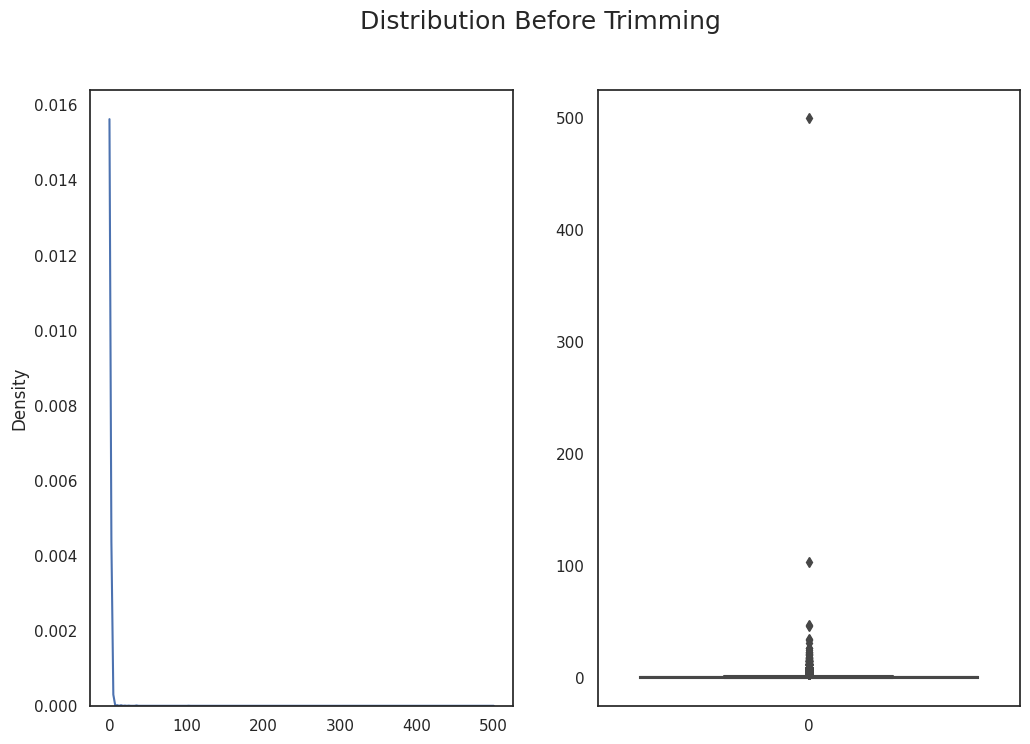

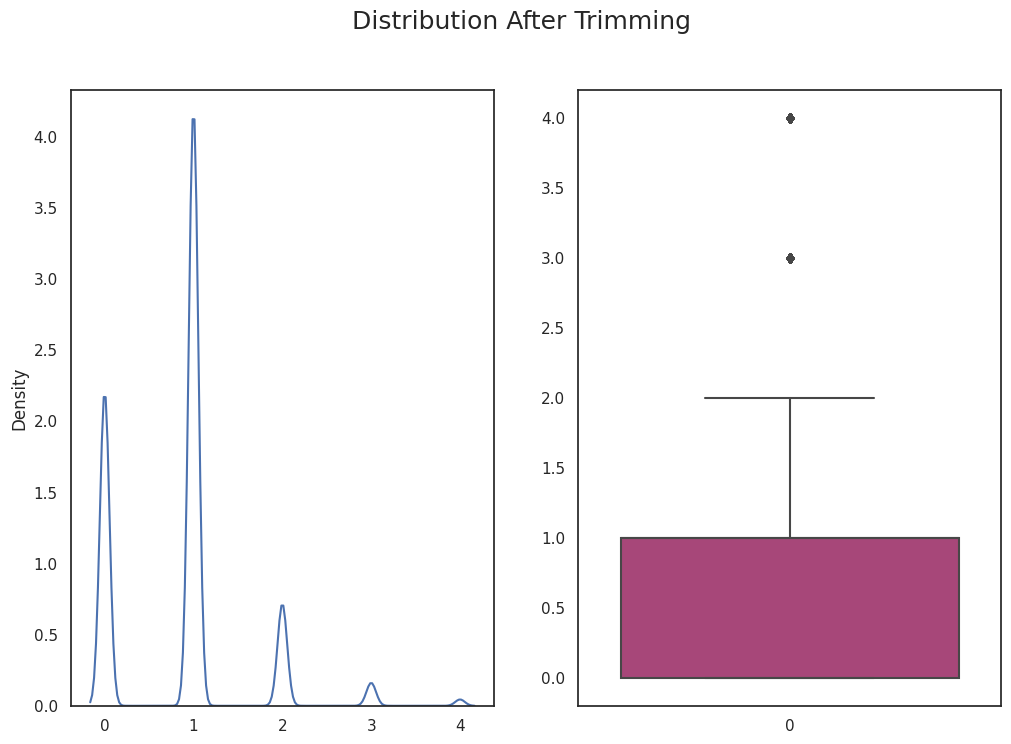

In [48]:
# Before Trimming
plt.figure(figsize = (12, 8))
plt.suptitle("Distribution Before Trimming", fontsize = 18)
plt.subplot(1, 2, 1)
sns.kdeplot(data = df['Total'].values)
plt.subplot(1, 2, 2)
sns.boxplot(data = df['Total'].values, palette = "magma")

# After Trimming
plt.figure(figsize = (12, 8))
plt.suptitle("Distribution After Trimming", fontsize = 18)
plt.subplot(1, 2, 1)
sns.kdeplot(data = df_normal_new['Total'].values)
plt.subplot(1, 2, 2)
sns.boxplot(data = df_normal_new['Total'].values, palette = "magma")
plt.show()

## IV. Mô hình hóa dữ liệu
### 1. Rút trích đặc trưng
- Xóa `Incident_ID` ra khỏi dataframe.

In [49]:
df.reset_index(drop = True)

,Incident_Date,State_Code,City_Or_County,Address,Killed,Injured,Total,Year,Quarter,Month,Day_Of_Week,State_Name
0,2014-01-01,KY,Lexington,Sixth St and Elm Tree Ln,0,1,1,2014,1,1,Wednesday,Kentucky
1,2014-01-01,KY,Cynthiana,US 62,0,1,1,2014,1,1,Wednesday,Kentucky
2,2014-01-01,KY,Louisville,S 38th St and W Broadway,0,1,1,2014,1,1,Wednesday,Kentucky
3,2014-01-01,OK,Lawton,NW Sheridan Rd and NW Pollard Ave,0,0,0,2014,1,1,Wednesday,Oklahoma
4,2014-01-01,OK,Okmulgee,19700 block of Sharp Rd,0,2,2,2014,1,1,Wednesday,Oklahoma
...,...,...,...,...,...,...,...,...,...,...,...,...
418099,2020-01-30,TN,Memphis,Overton Crossing St and Durham Ave,1,0,1,2020,1,1,Thursday,Tennessee
418100,2021-10-10,CO,Arvada,6925 W 84th Way,0,1,1,2021,4,10,Sunday,Colorado
418101,2019-08-05,AZ,Heber,NaN,1,0,1,2019,3,8,Monday,Arizona
418102,2020-09-09,IL,Waukegan,NaN,1,0,1,2020,3,9,Wednesday,Illinois


- Chọn ra tiểu bang có số vụ xả súng nhiều nhất. Ở đây là bang Illinois.

In [50]:
STATE = df['State_Name'].value_counts().keys()[0]
STATE

'Illinois'

- Thiệt hại về người từ các vụ xả súng (tính theo tuần).

In [51]:
state_df = df.resample('W', on = 'Incident_Date').sum()

state_df.reset_index(inplace = True)

state_df.drop(state_df.columns[[4, 5, 6]], axis = 1, inplace = True)

state_df

,Incident_Date,Killed,Injured,Total
0,2014-01-05,177,352,529
1,2014-01-12,196,356,552
2,2014-01-19,249,418,667
3,2014-01-26,252,364,616
4,2014-02-02,243,329,572
...,...,...,...,...
413,2021-12-05,381,696,1077
414,2021-12-12,404,622,1026
415,2021-12-19,377,662,1039
416,2021-12-26,392,655,1047


- Xóa dòng cuối vì dữ liệu bị lấn sang năm 2022.

<Axes: xlabel='Incident_Date', ylabel='Count'>

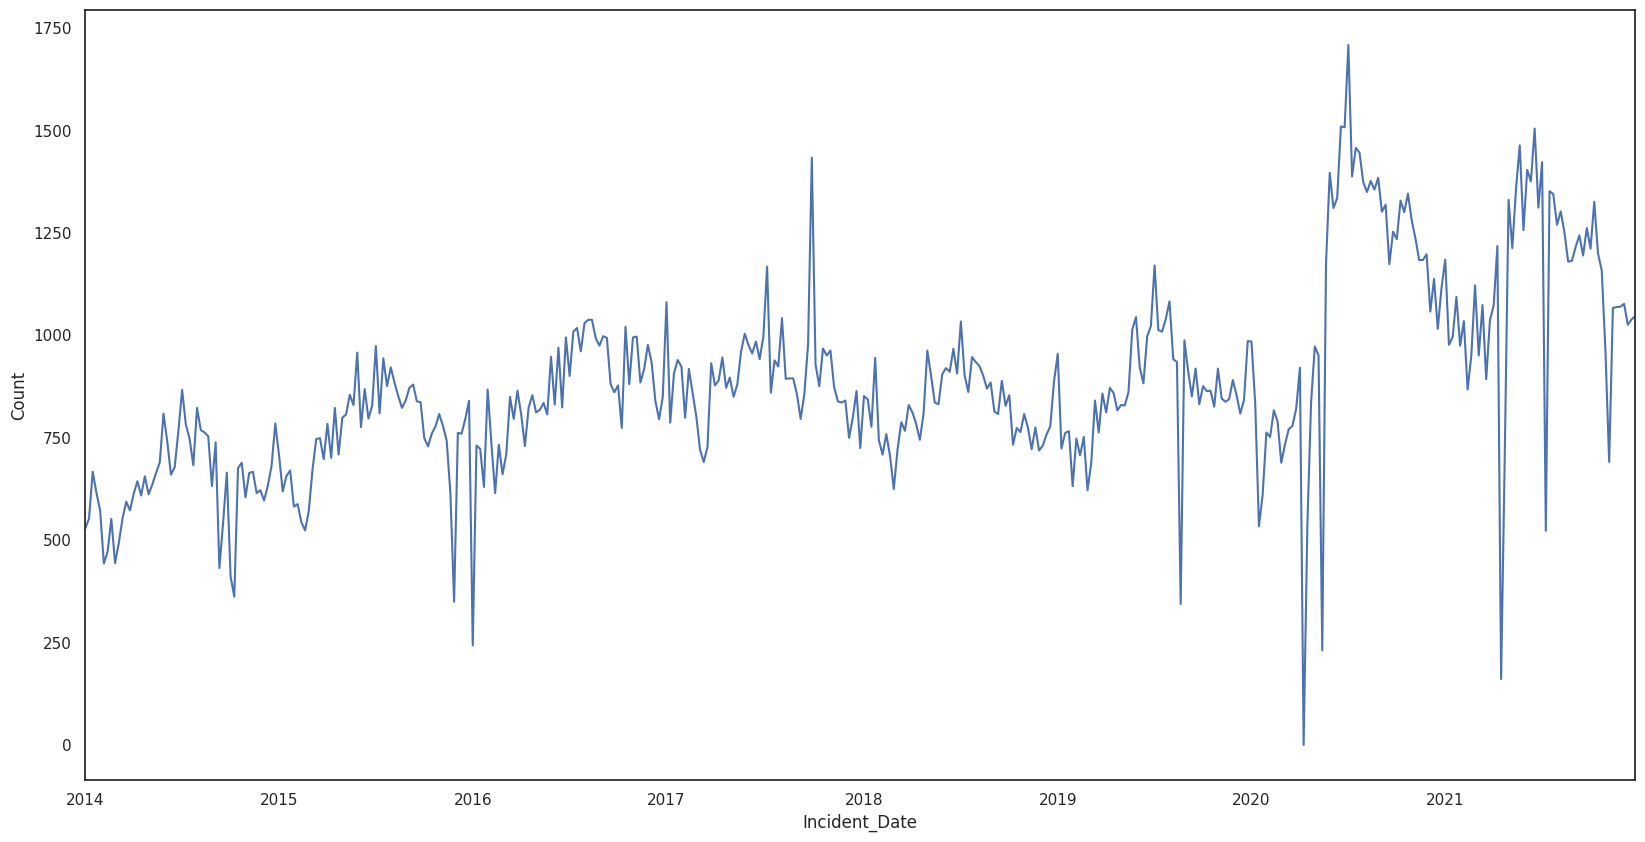

In [52]:
state_df = state_df[:-1]

state_df.groupby('Incident_Date')['Total'].sum().plot(ylabel = "Count", figsize = (20, 10))

##### - Trong tuần 5/7/2020 là có thiệt hại lớn về người: 509 chết, 1200 bị thương nâng tổng thiệt hại về người lên tới con số 1709

In [53]:
state_df.iloc[state_df['Total'].idxmax()]

Incident_Date    2020-07-05 00:00:00
Killed                           509
Injured                         1200
Total                           1709
Name: 339, dtype: object

### 2. Xây dựng mô hình với Prophet


In [54]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

##### - **Prophet** có thể hiểu như một mô hình API của sklearn. Bên cạnh đó, nó cũng hỗ trợ cho tính năng `fit` và `predict` model.
##### - Tham số đầu vào của **Prophet** luôn là một dataframe với 2 cột: `ds (datestamp)` và `y` là thuộc tính đại diện dạng numeric mà chúng ta muốn dự báo.

In [55]:
temp = state_df[['Incident_Date', 'Total']]
temp.rename(columns={'Total': 'y', 'Incident_Date': 'ds'}, inplace=True)
model = Prophet(seasonality_mode='multiplicative')
model.fit(temp)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93g6y71i/81c6gmct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93g6y71i/6sdwh7z0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89894', 'data', 'file=/tmp/tmp93g6y71i/81c6gmct.json', 'init=/tmp/tmp93g6y71i/6sdwh7z0.json', 'output', 'file=/tmp/tmp93g6y71i/prophet_model19jpnh_0/prophet_model-20230518010904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:09:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:09:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##### - Đưa ra dự báo về các con số trong tương lai. Cụ thể là trong 210 tuần tiếp theo

- `ds` là ngày diễn ra

- `yhat` là con số ước tính

- `yhat_lower` và `yhat_upper` là khoảng dự đoán.

In [56]:
future = model.make_future_dataframe(periods=210, freq='W')
forecast = model.predict(future)
print(forecast.columns)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yhat'],
      dtype='object')


,ds,yhat,yhat_lower,yhat_upper
622,2025-12-07,1542.368910,1344.481828,1753.821832
623,2025-12-14,1542.899071,1341.556254,1750.870324
624,2025-12-21,1569.979598,1365.193702,1794.021776
625,2025-12-28,1607.128757,1393.184481,1810.215688
626,2026-01-04,1616.282794,1406.561282,1813.548782


##### - Trực quan hóa.

In [57]:
plot_plotly(model, forecast)

## Câu hỏi: Tại sao lại không dự đoán các vụ xả súng theo ngày, theo tháng, theo năm mà lại dự đoán theo tuần? 

- Với `tháng` và `năm` thì số điểm dữ liệu sẽ rất ít. Đường dự đoán không thấy quá nhiều biến động nên khi quan sát sẽ dễ bỏ lỡ rất nhiều dữ liệu quan trọng.

- Còn nếu tính theo `ngày` thì đường dự đoán sẽ biến động rất nhiều dẫn đến khó quan sát, và sẽ có rất nhiều điểm dữ liệu.

=> Vậy nên nhóm chọn gom gọn lại theo tuần.

## Câu hỏi: Tại sao lại không giảm chiều dữ liệu?

- Vì mô hình chỉ nạp vào 2 thuộc tính (`ds` và `y`) nên kết quả dự đoán đầu ra chỉ là mảng một chiều chứ không phải là ma trận 

=> Giảm chiều dữ liệu là không cần thiết.

## Nhận xét:
- Nhìn chung thì thì các điểm thực tế (màu đen) bám sát với đường dự đoán (màu xanh) và năm trong khoảng dao động.

- Đường đự đoán biến động tịnh tiến theo quỹ đạo giống nhau, không thay đổi.

- Tuy nhiên, đường dự đoán vẫn bỏ sót một vài điểm ngoại lai. Những điểm này vượt khỏi khoảng dự đoán của chúng ta (quá nhiều hoặc quá ít), ta có thể bỏ qua vì nó không ảnh hưởng nhiều đến mô hình dự đoán kết quả

### 3. Cross Validation


In [58]:
from prophet.diagnostics import cross_validation

##### - Prophet cung cấp tính năng `cross validation` cho `time series` để đo lỗi dự báo bằng dữ liệu trước đó.

##### - Điều này được thực hiện bằng cách chọn các điểm cắt (cutoff points) trước đó và đối với mỗi điểm trong số chúng, mô hình chỉ sử dụng dữ liệu cho đến điểm cắt đó.

#### => Có thể so sánh các giá trị dự báo với các giá trị thực tế.

### 3.1. Ước lượng tham số đầu vào

- `initial: ` Số ngày bỏ qua từ ngày ban đầu, mặc định là gấp 3 lần `horizon`

- `period: ` Chu kỳ cho mỗi dự đoán

- `horizon: ` Số ngày cho dự đoán

##### -  Thực hiện xác thực chéo để đánh giá hiệu suất dự đoán trong khoảng thời gian 365 ngày. Bắt đầu với 1460 ngày đào tạo dữ liệu trong lần cắt đầu tiên và sau đó đưa ra dự đoán sau mỗi 180 ngày

In [89]:
df_cv = cross_validation(model, initial = '1460 days', period = '180 days', horizon = '365 days', parallel='processes')
df_cv

INFO:prophet:Making 7 forecasts with cutoffs between 2018-01-11 00:00:00 and 2020-12-26 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f89fc556830>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93g6y71i/8eqfe7dr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93g6y71i/4d93lobx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93g6y71i/mgwhebkq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93g6y71i/o_pebbjn.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21044', 'data', 'file=/tmp/tmp93g6y71i/8eqfe7dr.json', 'init=/tmp/tmp93g6y71i/mgwhebkq.json', 'output', 'file=/tmp/tmp93g6y71i/prophet_model821a9u1u/prophet_model-20230518013632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
01:36:32 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:running

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-01-14,862.028579,746.669994,982.544348,844,2018-01-11
1,2018-01-21,891.536621,770.721680,1013.820555,777,2018-01-11
2,2018-01-28,898.161942,785.844470,1023.015034,945,2018-01-11
3,2018-02-04,870.076994,745.878840,988.997753,744,2018-01-11
4,2018-02-11,820.726617,704.167255,946.742661,709,2018-01-11
...,...,...,...,...,...,...
360,2021-11-28,1294.973294,1132.718189,1455.182049,1070,2020-12-26
361,2021-12-05,1286.542954,1114.543416,1445.396201,1077,2020-12-26
362,2021-12-12,1285.676816,1123.449438,1449.261884,1026,2020-12-26
363,2021-12-19,1306.936490,1145.366906,1459.968960,1039,2020-12-26


In [90]:
df_cv['cutoff'].value_counts().sort_index()

2018-01-11    52
2018-07-10    52
2019-01-06    52
2019-07-05    52
2020-01-01    52
2020-06-29    52
2020-12-26    53
Name: cutoff, dtype: int64

### 3.2. Đánh giá mô hình

- `Mean Absolute Error (MAE): `Độ lớn trung bình của các lỗi trong một tập hợp các dự đoán mà không cần xem xét hướng của chúng.
$$
{\displaystyle \operatorname {MAE} ={\frac {1}{n}}\sum _{i=1}^{n}|\ Y_{i}-{\hat {Y_{i}}}|}
$$


- `Mean Squared Error (MSE) - Sai số toàn phương trung bình: `Là trung bình của bình phương các sai số, tức là sự khác biệt giữa các ước lượng và những gì được đánh giá.
$$
{\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(\ Y_{i}-{\hat {Y_{i}}})^{2}}
$$


- `Root Mean Squared Error (RMSE) - Độ lệch chuẩn của các phần dư - Sai số dự đoán: `Là căn bậc hai của mức trung bình của các sai số bình phương
$$
{\displaystyle \operatorname {RMSE} = \sqrt{{\frac {1}{n}}\sum _{i=1}^{n}(\ Y_{i}-{\hat {Y_{i}}})^{2}}} = \sqrt{MSE}
$$

- `Mean Absolute Percentage Error (MAPE)`: Đo lường độ chính xác của một hệ thống dự báo.
$$
{\displaystyle \operatorname {MAPE} ={\frac {1}{n}}\sum _{i=1}^{n}{\frac {Y_{actual} - {Y_{forecast}}}{Y_{actual}}}}
$$

In [91]:
MAPE = np.abs((df_cv['y'] - df_cv['yhat']) / df_cv['y'])

MAPE.sum()

inf

In [92]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,36 days,40311.984044,200.778445,137.999476,0.095044,0.136772,0.638889
1,37 days,40300.780161,200.750542,137.628015,0.095044,0.136484,0.638889
2,38 days,39080.136799,197.686967,132.322260,0.085481,0.131702,0.666667
3,39 days,39071.111483,197.664138,131.831019,0.085481,0.131128,0.666667
4,40 days,38278.670419,195.649356,128.549136,0.079361,0.127384,0.694444
...,...,...,...,...,...,...,...
325,361 days,96482.942615,310.617035,262.480522,0.225046,0.249321,0.194444
326,362 days,93003.552926,304.964839,256.946644,0.217365,0.243159,0.194444
327,363 days,94121.426742,306.792156,259.790046,0.217365,0.244798,0.194444
328,364 days,88577.431781,297.619609,252.598955,0.217365,0.241242,0.194444


#### - Vì y gần bằng 0 nên MAPE bị bỏ qua. `SMAPE - symmetric MAPE` là một trong những lựa chọn thay thế để khắc phục những hạn chế do lỗi dự báo MAPE. SMAPE có cả giới hạn dưới và giới hạn trên, do đó, nó được coi là đối xứng (symmetric) của MAPE.
$$
{\displaystyle \operatorname {SMAPE} ={\frac {1}{n}}\sum _{i=1}^{n}{\frac {2 * |Y_{forecast} - {Y_{actual}}|}{|Y_{actual}|+|Y_{forecast}|}}}
$$

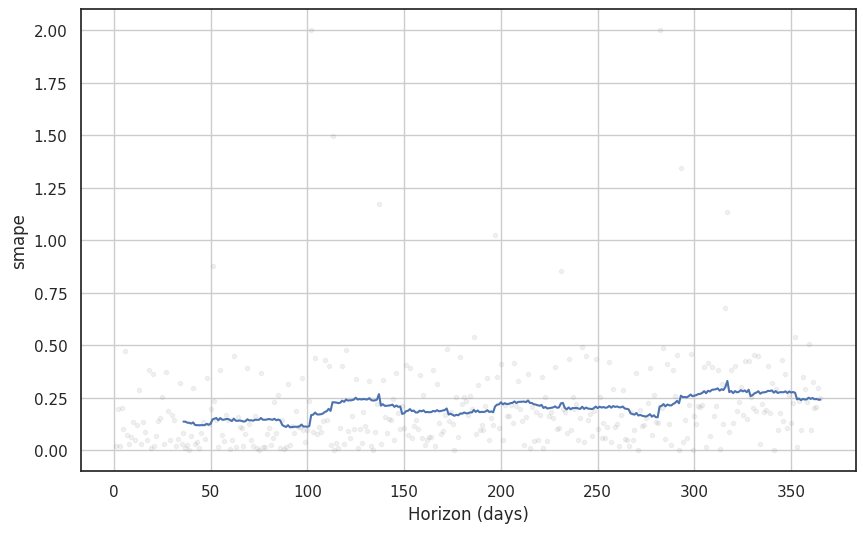

In [93]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='smape', rolling_window = 0.1)

## Nhận xét:
- Nhìn chung thì đồ thị có xu hướng tăng dần theo ngày dự đoán.

- 